In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Dataframes by Loading CSV Files

In [102]:
df_0_shot = pd.read_csv('../results/humaneval_x/humaneval_x_0_shot.csv')
df_3_shot = pd.read_csv('../results/humaneval_x/humaneval_x_3_shot.csv')


In [103]:
df_0_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        41000 non-null  object 
 1   Benchmark prompt           41000 non-null  object 
 2   Execution time (s)         41000 non-null  object 
 3   CPU Energy (J)             41000 non-null  object 
 4   RAM Energy (J)             41000 non-null  object 
 5   GPU Energy (J)             41000 non-null  object 
 6   CPU Power (W)              41000 non-null  object 
 7   RAM Power (W)              41000 non-null  object 
 8   GPU Power (W)              41000 non-null  object 
 9   CO2 emissions (Kg)         41000 non-null  object 
 10  CO2 emissions rate (Kg/s)  41000 non-null  object 
 11  Pass@1                     41000 non-null  float64
 12  Pass@10                    41000 non-null  float64
 13  GoogleBLEU                 41000 non-null  flo

In [104]:
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40250 entries, 0 to 40249
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        40250 non-null  object 
 1   Benchmark prompt           40250 non-null  object 
 2   Execution time (s)         40250 non-null  object 
 3   CPU Energy (J)             40250 non-null  object 
 4   RAM Energy (J)             40250 non-null  object 
 5   GPU Energy (J)             40250 non-null  object 
 6   CPU Power (W)              40250 non-null  object 
 7   RAM Power (W)              40250 non-null  object 
 8   GPU Power (W)              40250 non-null  object 
 9   CO2 emissions (Kg)         40250 non-null  object 
 10  CO2 emissions rate (Kg/s)  40250 non-null  object 
 11  Pass@1                     40250 non-null  float64
 12  Pass@10                    40250 non-null  float64
 13  GoogleBLEU                 40250 non-null  flo

### Remove execution/lines with "ERROR"

In [105]:
# Remove rows where at least one column contains 'Error'
df_0_shot = df_0_shot[~df_0_shot.isin(['ERROR']).any(axis=1)]
df_3_shot = df_3_shot[~df_3_shot.isin(['ERROR']).any(axis=1)]


### Cast data types

In [106]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_0_shot['LLM'] = df_0_shot['LLM'].astype(str)
df_0_shot['Benchmark prompt'] = df_0_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_0_shot[float_columns] = df_0_shot[float_columns].astype(float)
df_0_shot

,LLM,Benchmark prompt,Execution time (s),CPU Energy (J),RAM Energy (J),GPU Energy (J),CPU Power (W),RAM Power (W),GPU Power (W),CO2 emissions (Kg),CO2 emissions rate (Kg/s),Pass@1,Pass@10,GoogleBLEU,CodeBLEU,SacreBLEU
0,codegeex4-all-9b-Q6_K_L,CPP/0,132.073570,9319.037920,1545.810825,355.498284,64.913202,11.705788,2.637476,0.000731,0.000006,0.010976,0.085366,0.105386,0.221068,9.751692
1,codegeex4-all-9b-Q6_K_L,CPP/0,16.343099,1072.663639,191.258240,45.322036,64.854828,11.705788,2.695437,0.000085,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
2,codegeex4-all-9b-Q6_K_L,CPP/0,126.372966,8215.339606,1479.091709,341.446273,64.894342,11.705788,2.536212,0.000654,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
3,codegeex4-all-9b-Q6_K_L,CPP/0,126.331573,8214.154793,1478.607433,356.680285,64.886760,11.705788,2.850919,0.000655,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
4,codegeex4-all-9b-Q6_K_L,CPP/0,44.578817,2906.139294,521.768781,129.671104,64.916582,11.705788,2.838451,0.000232,0.000005,0.010976,0.085366,0.105386,0.221068,9.751692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40995,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,26.423076,1728.587717,309.261063,63.663051,64.920785,11.705788,2.365661,0.000137,0.000005,0.035976,0.170732,0.140678,0.345476,13.363577
40996,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,22.027845,1447.056963,257.810460,56.325045,64.918214,11.705788,2.670214,0.000115,0.000005,0.035976,0.170732,0.140678,0.345476,13.363577
40997,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,102.924208,6694.642819,1204.657871,258.782207,64.912734,11.705788,2.423034,0.000532,0.000005,0.035976,0.170732,0.140678,0.345476,13.363577
40998,Meta-Llama-3-8B-Instruct-Q6_K,Java/163,102.954767,6700.849840,1205.014769,250.312200,64.920419,11.705788,2.322623,0.000532,0.000005,0.035976,0.170732,0.140678,0.345476,13.363577


In [107]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_3_shot['LLM'] = df_3_shot['LLM'].astype(str)
df_3_shot['Benchmark prompt'] = df_3_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_3_shot[float_columns] = df_3_shot[float_columns].astype(float)
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39504 entries, 0 to 40249
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        39504 non-null  object 
 1   Benchmark prompt           39504 non-null  object 
 2   Execution time (s)         39504 non-null  float64
 3   CPU Energy (J)             39504 non-null  float64
 4   RAM Energy (J)             39504 non-null  float64
 5   GPU Energy (J)             39504 non-null  float64
 6   CPU Power (W)              39504 non-null  float64
 7   RAM Power (W)              39504 non-null  float64
 8   GPU Power (W)              39504 non-null  float64
 9   CO2 emissions (Kg)         39504 non-null  float64
 10  CO2 emissions rate (Kg/s)  39504 non-null  float64
 11  Pass@1                     39504 non-null  float64
 12  Pass@10                    39504 non-null  float64
 13  GoogleBLEU                 39504 non-null  flo

In [108]:
# Extract keywords from "Benchmark prompt"
df_0_shot['Programming Language'] = df_0_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')
df_3_shot['Programming Language'] = df_3_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')

df_0_shot['Programming Language'] = df_0_shot['Programming Language'].replace('CPP', 'C++')
df_3_shot['Programming Language'] = df_3_shot['Programming Language'].replace('CPP', 'C++')

# Print unique programming languages
print(f"df_0_shot -> {df_0_shot['Programming Language'].dropna().unique()}")
print(f"df_3_shot -> {df_3_shot['Programming Language'].dropna().unique()}")

# Check if unique programming languages are the same
if set(df_0_shot['Programming Language'].dropna().unique()) == set(df_3_shot['Programming Language'].dropna().unique()):
    print("Same languages!")
else:
    print("[WARNING] At least 1 language is not present in both dataframes")


df_0_shot -> ['C++' 'Go' 'Python' 'Java' 'JavaScript']
df_3_shot -> ['JavaScript' 'C++' 'Java' 'Python' 'Go']
Same languages!


### Remove outliers

In [109]:
# Function to remove outliers using the IQR method and return the number of removed outliers and original count
def remove_outliers_and_count(group):
    threshold = 0.5
    # Calculate IQR for 'CPU Energy (J)'
    Q1 = group['CPU Energy (J)'].quantile(0.25)
    Q3 = group['CPU Energy (J)'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Filter the data to remove outliers
    filtered_group = group[(group['CPU Energy (J)'] >= lower_bound) & (group['CPU Energy (J)'] <= upper_bound)]
    
    # Calculate the number of outliers removed
    num_removed = len(group) - len(filtered_group)
    
    # Return the filtered group and the number of removed outliers, as well as the original count
    return filtered_group, num_removed, len(group)

# Initialize lists to store the number of outliers removed and original counts for each subset
outliers_list_0 = []
outliers_list_3 = []

# Remove outliers and count them for df_0_shot
df_0_no_outliers_list = []
for (llm, prompt), group in df_0_shot.groupby(['LLM', 'Benchmark prompt']):
    filtered_group, num_removed, original_count = remove_outliers_and_count(group)
    df_0_no_outliers_list.append(filtered_group)
    outliers_list_0.append([llm, prompt, num_removed, original_count])  # Store original count

df_0_no_outliers = pd.concat(df_0_no_outliers_list).reset_index(drop=True)

# Remove outliers and count them for df_3_shot
df_3_no_outliers_list = []
for (llm, prompt), group in df_3_shot.groupby(['LLM', 'Benchmark prompt']):
    filtered_group, num_removed, original_count = remove_outliers_and_count(group)
    df_3_no_outliers_list.append(filtered_group)
    outliers_list_3.append([llm, prompt, num_removed, original_count])  # Store original count

df_3_no_outliers = pd.concat(df_3_no_outliers_list).reset_index(drop=True)

In [110]:
# Check how many prompt_id remains in each programming language after the outliers removal

print("----------------------- 0-shot -----------------------")
print(f"Java ->  {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'C++']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")

print("----------------------- 3-shot -----------------------")
print(f"Java ->  {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'C++']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")


----------------------- 0-shot -----------------------
Java ->  164
C++ -> 164
JavaScript -> 164
Go -> 164
Python -> 164
----------------------- 3-shot -----------------------
Java ->  161
C++ -> 161
JavaScript -> 161
Go -> 161
Python -> 161


### Statistical tests

In [111]:
df_0_no_outliers['Origin'] = '0-shot'
df_3_no_outliers['Origin'] = '3-shot'

df_combined_no_outliers = pd.concat([df_0_no_outliers, df_3_no_outliers], ignore_index=True)
df_combined_no_outliers.columns


Index(['LLM', 'Benchmark prompt', 'Execution time (s)', 'CPU Energy (J)',
       'RAM Energy (J)', 'GPU Energy (J)', 'CPU Power (W)', 'RAM Power (W)',
       'GPU Power (W)', 'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)',
       'Pass@1', 'Pass@10', 'GoogleBLEU', 'CodeBLEU', 'SacreBLEU',
       'Programming Language', 'Origin'],
      dtype='object')

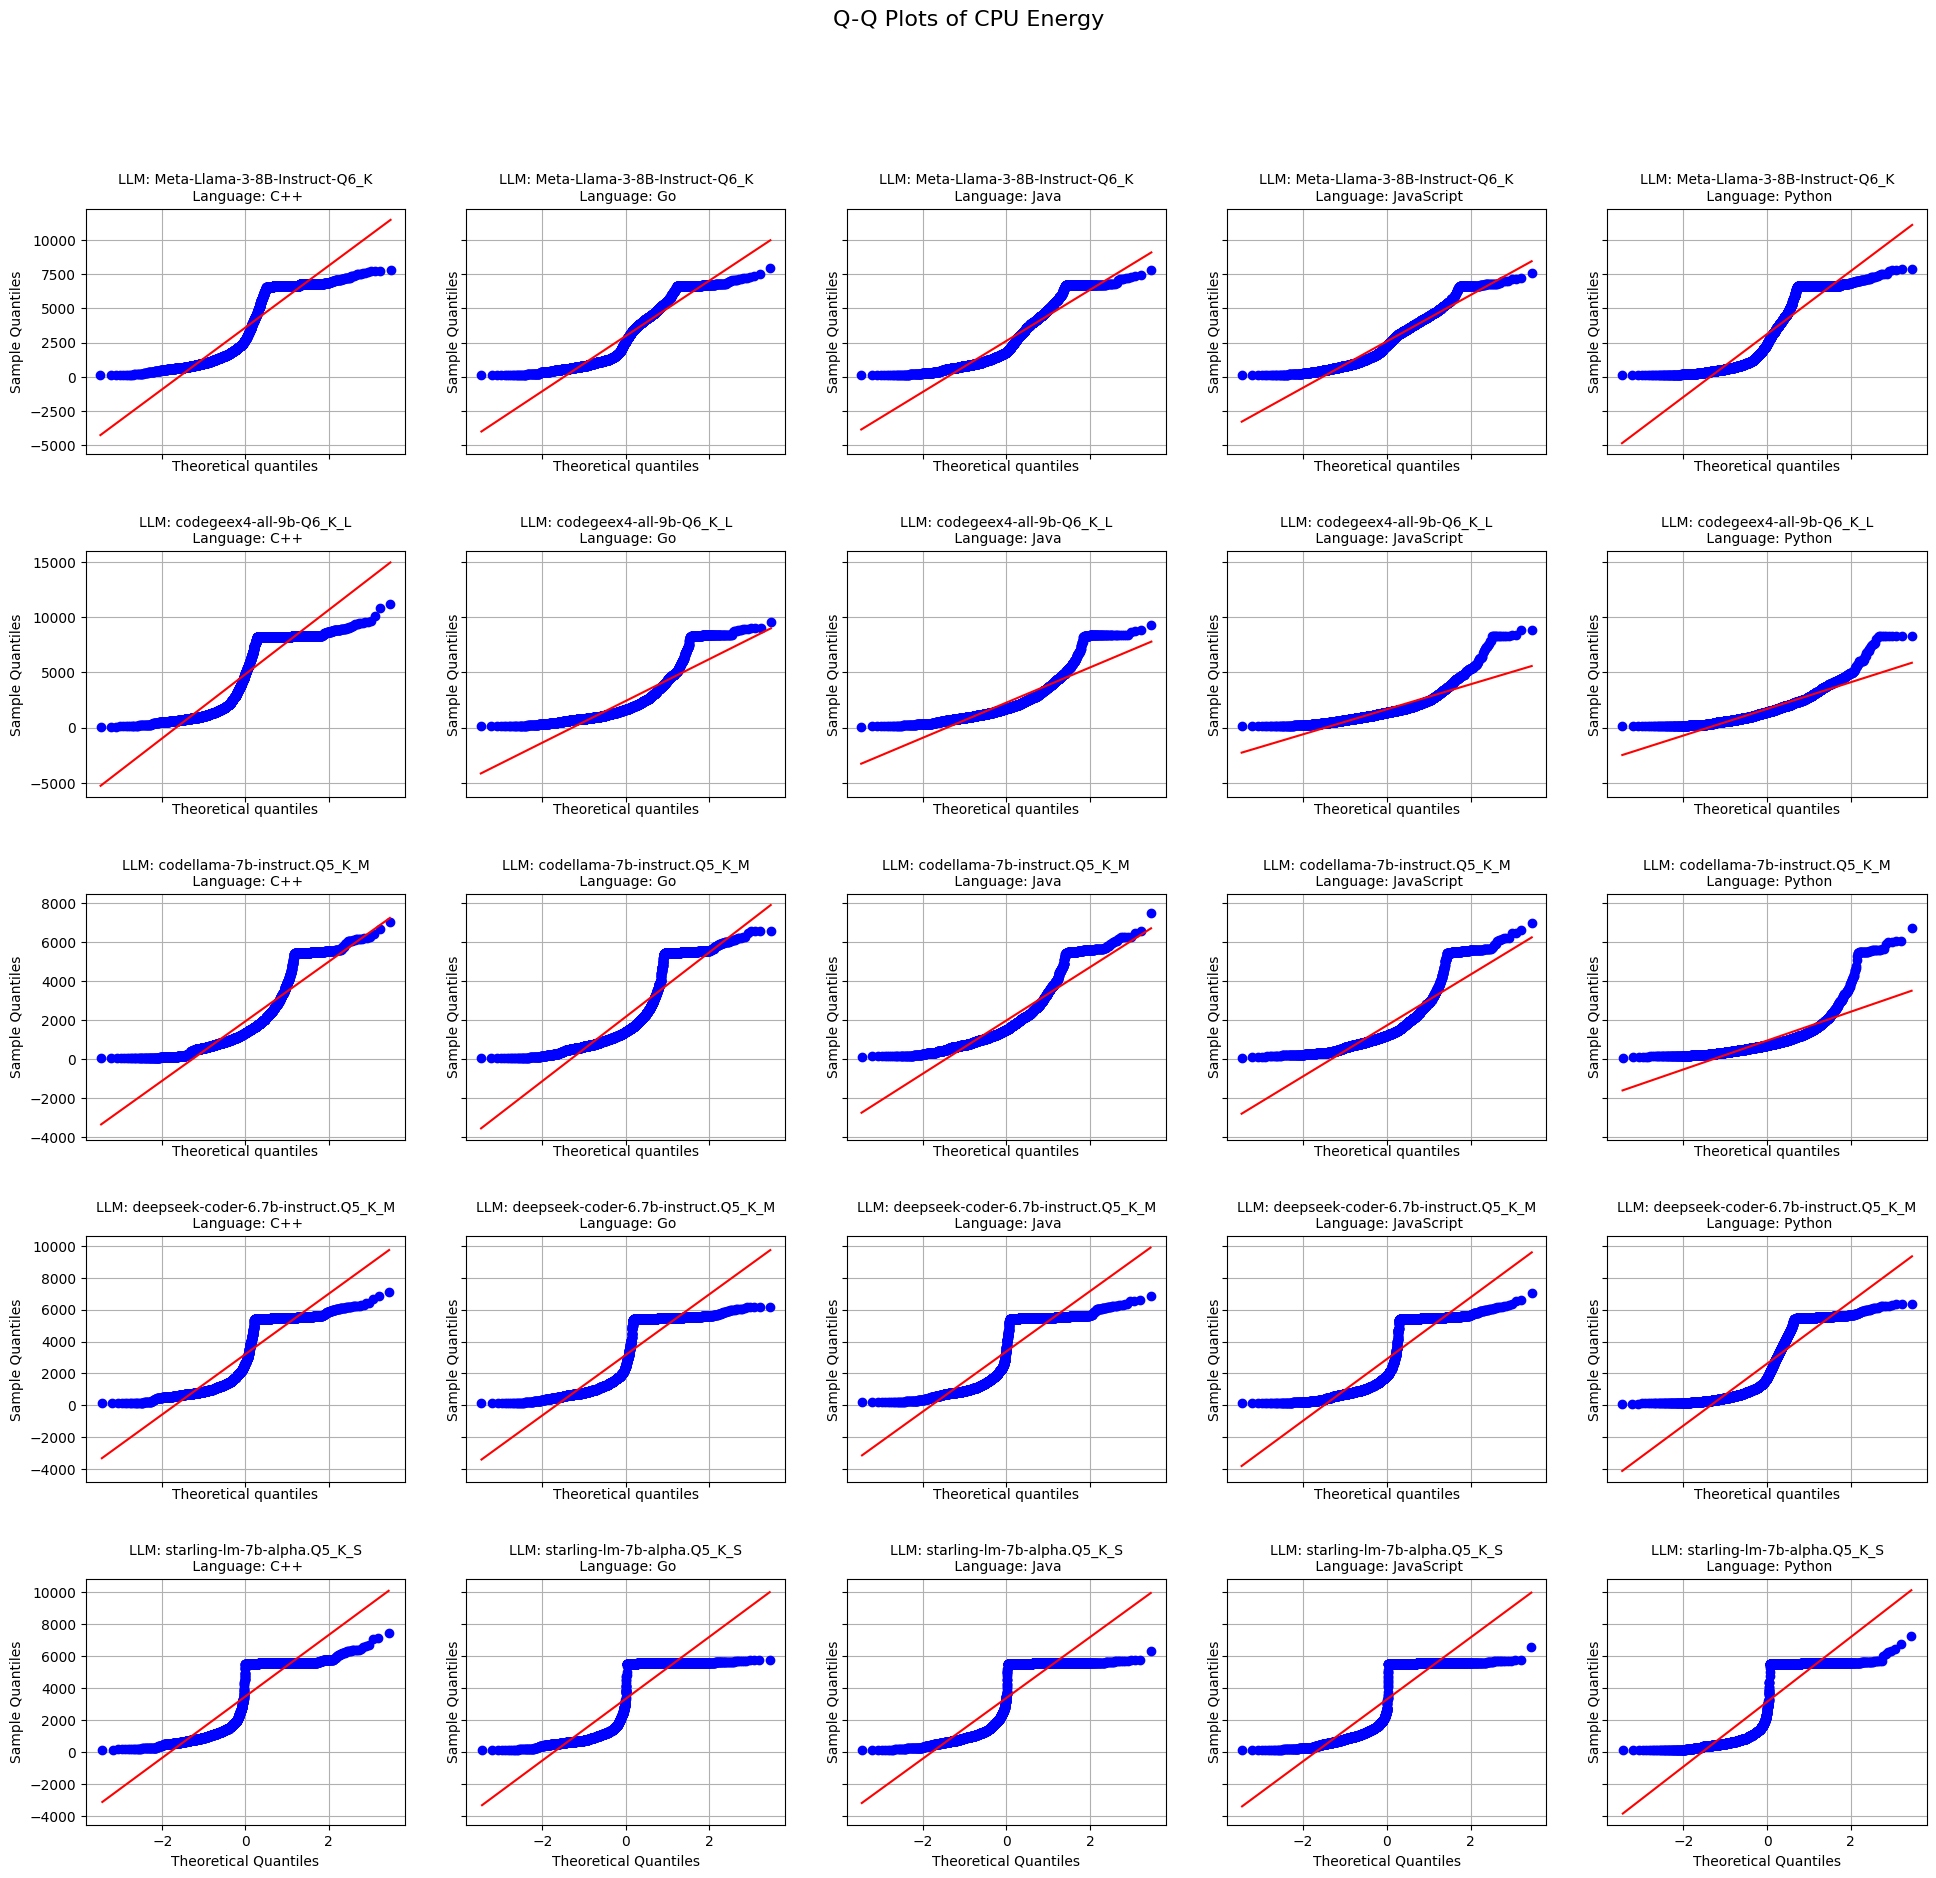

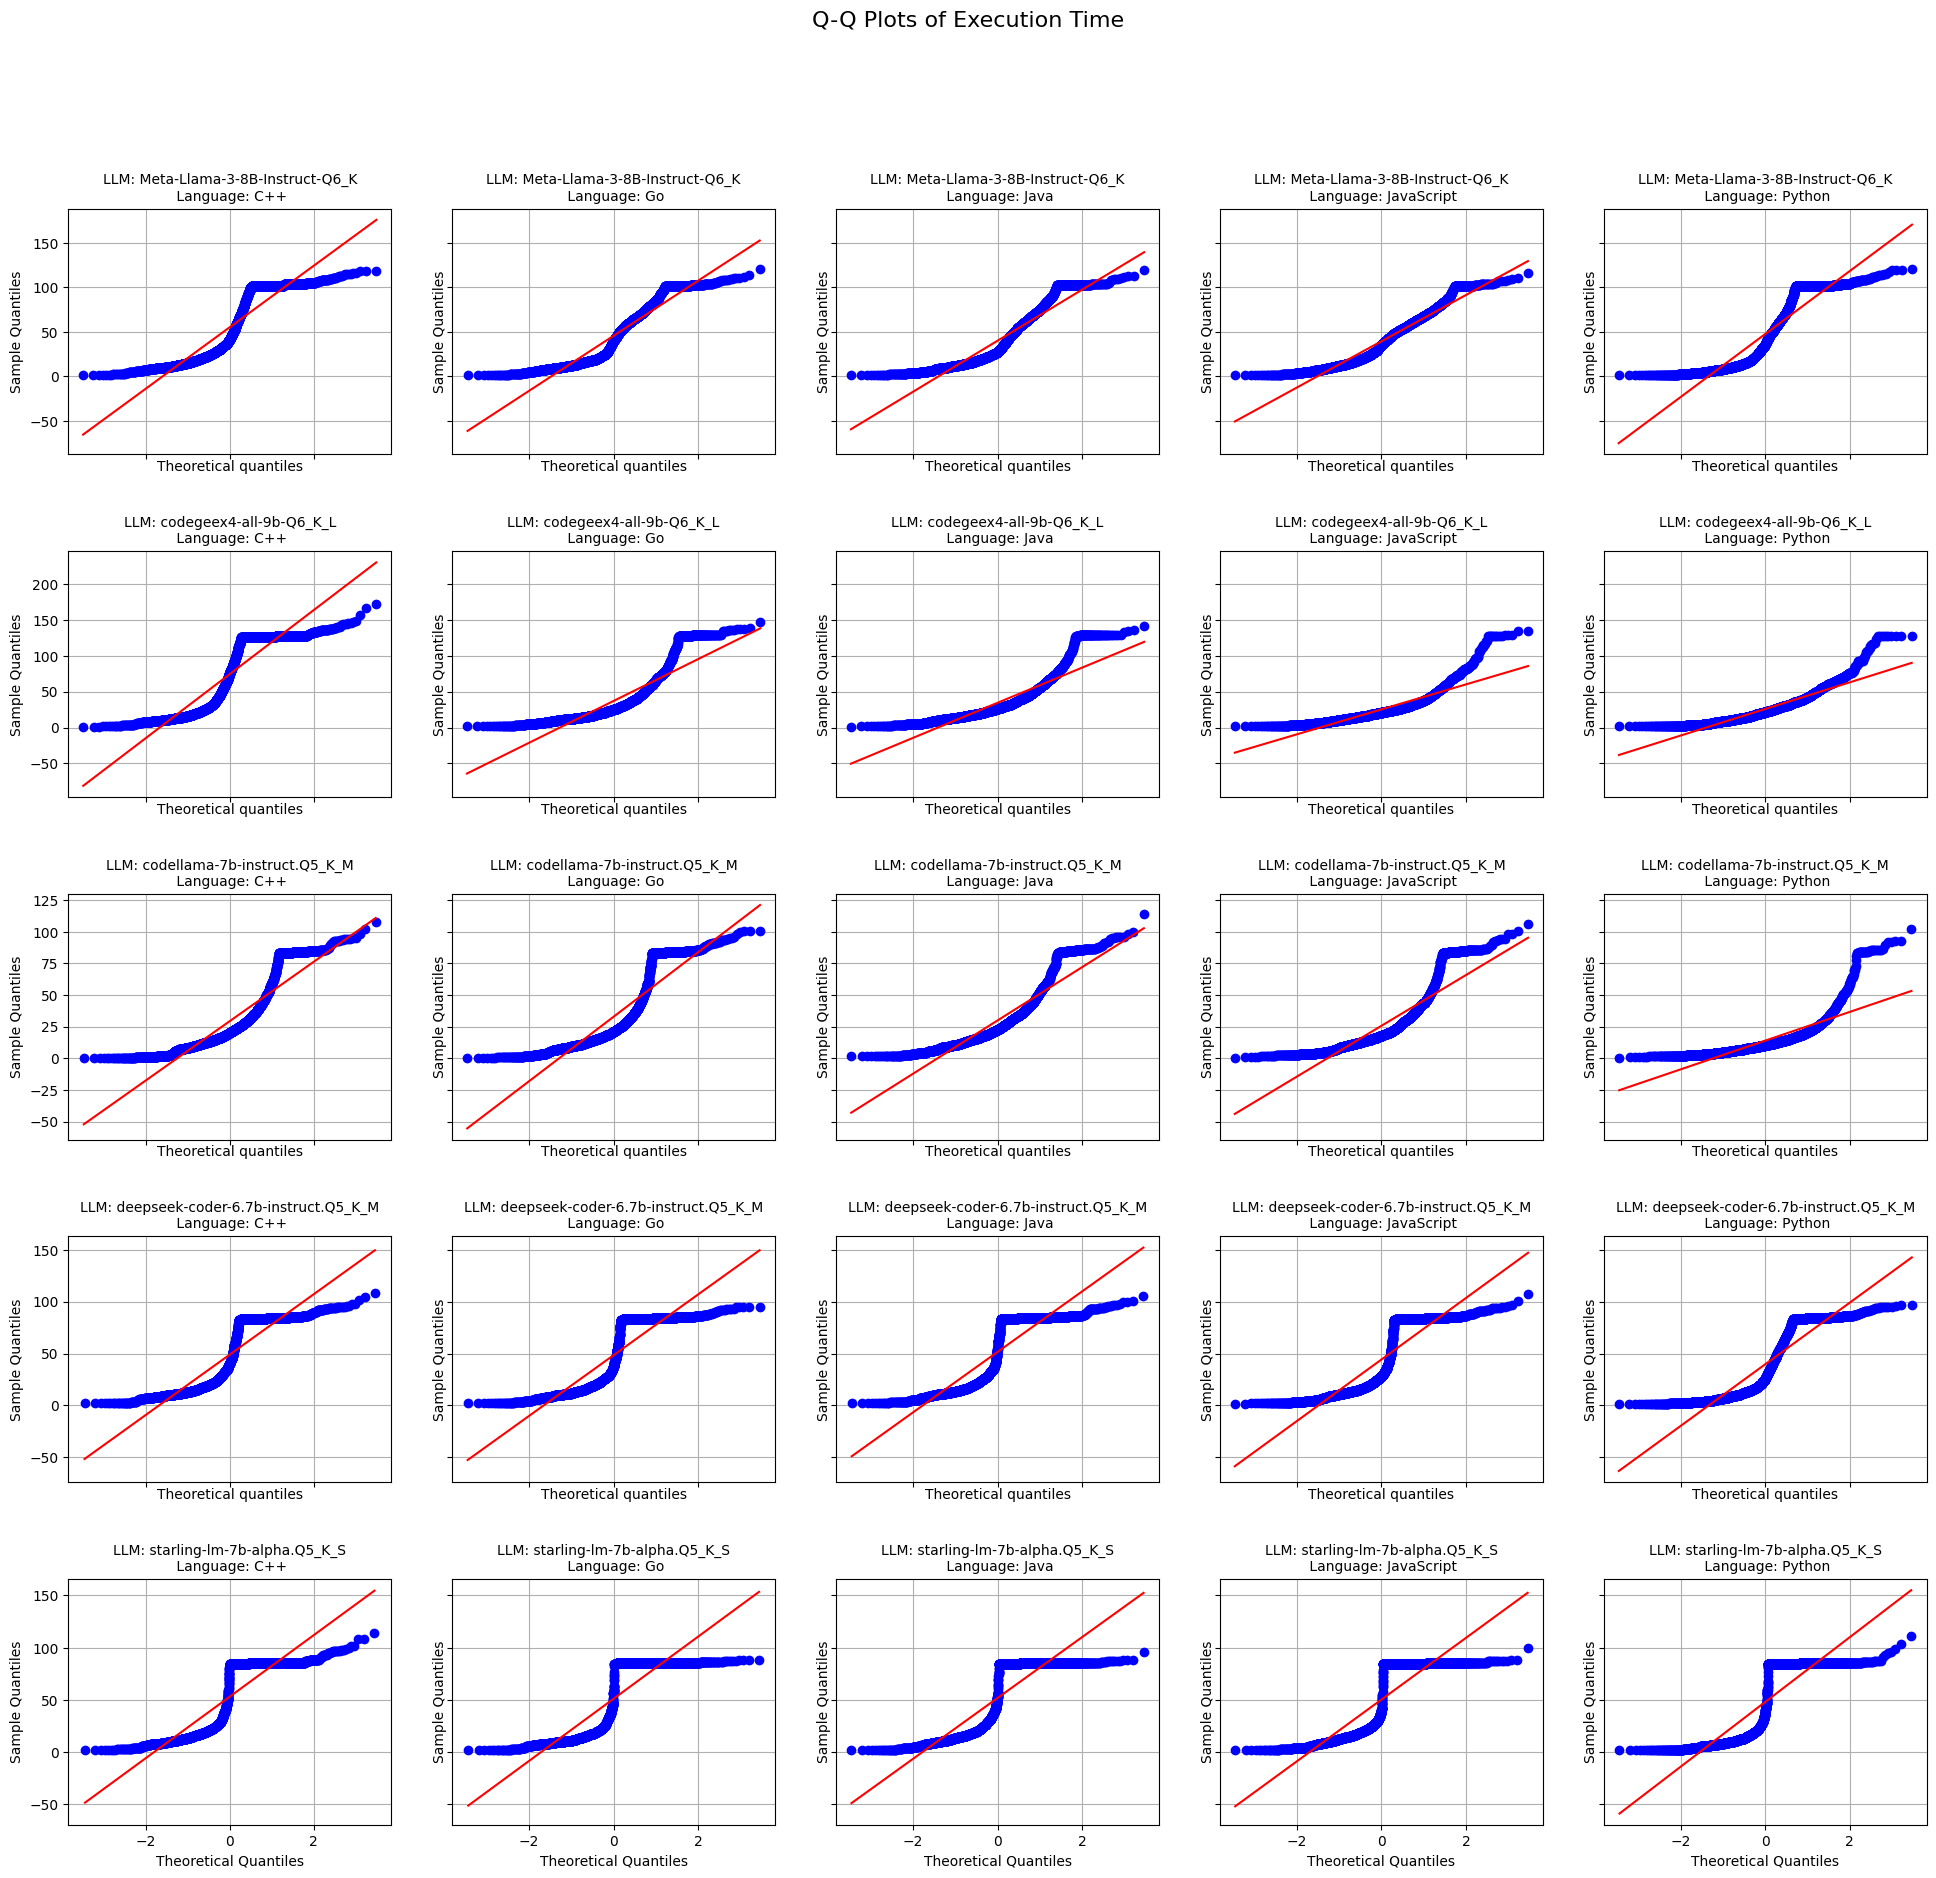

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Obter todos os valores únicos de LLM e Linguagens de Programação
unique_llms = df_combined_no_outliers["LLM"].unique()
unique_languages = df_combined_no_outliers["Programming Language"].unique()

# Definir o número de subplots
num_llms = len(unique_llms)
num_languages = len(unique_languages)

# Criar subplots para CPU Energy
fig1, axs1 = plt.subplots(num_llms, num_languages, figsize=(20, 20), sharex='col', sharey='row')
fig1.suptitle('Q-Q Plots of CPU Energy', fontsize=16)

# Criar subplots para Execution Time
fig2, axs2 = plt.subplots(num_llms, num_languages, figsize=(20, 20), sharex='col', sharey='row')
fig2.suptitle('Q-Q Plots of Execution Time', fontsize=16)

# Iterar sobre cada combinação de LLM e Linguagem de Programação
for i, l in enumerate(unique_languages):
    for j, llm in enumerate(unique_llms):
        aux_df = df_combined_no_outliers[
            (df_combined_no_outliers["LLM"] == llm) & 
            (df_combined_no_outliers["Programming Language"] == l)
        ]

        # Verificar se o DataFrame não está vazio
        if not aux_df.empty:
            # Q-Q Plot de CPU Energy
            cpu_energy_data = aux_df['CPU Energy (J)']
            stats.probplot(cpu_energy_data, dist="norm", plot=axs1[j, i])
            axs1[j, i].set_title(f'LLM: {llm}\n Language: {l}', fontsize=10)
            axs1[j, i].set_ylabel('Sample Quantiles')
            axs1[j, i].grid()

            # Q-Q Plot de Execution Time
            execution_time_data = aux_df['Execution time (s)']
            stats.probplot(execution_time_data, dist="norm", plot=axs2[j, i])
            axs2[j, i].set_title(f'LLM: {llm}\n Language: {l}', fontsize=10)
            axs2[j, i].set_ylabel('Sample Quantiles')
            axs2[j, i].grid()
        else:
            axs1[j, i].set_visible(False)  # Oculta o subplot se não houver dados
            axs2[j, i].set_visible(False)

# Configurar rótulos do eixo x
for ax in axs1[-1]:  # Última linha dos subplots de CPU Energy
    ax.set_xlabel('Theoretical Quantiles')

for ax in axs2[-1]:  # Última linha dos subplots de Execution Time
    ax.set_xlabel('Theoretical Quantiles')

# Ajustar espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.5)  # Espaçamento vertical entre os gráficos

# Ajustar espaçamento entre gráficos na vertical
fig1.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para CPU Energy
fig2.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para Execution Time

# Mostrar os plots
plt.show()


#### By programming language

In [113]:
import pandas as pd
from scipy.stats import shapiro

# Inicializar listas para armazenar os resultados
results = []

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, prompt, origin), group in df_combined_no_outliers.groupby(['LLM', 'Programming Language', 'Origin']):
    # Teste de Shapiro-Wilk para CPU Energy
    stat_energy, p_value_energy = shapiro(group['CPU Energy (J)'])  # Teste de Shapiro-Wilk
    is_normal_energy = 'Normal' if p_value_energy > 0.05 else 'Not Normal'  # Verificar normalidade

    # Teste de Shapiro-Wilk para Execution Time
    stat_time, p_value_time = shapiro(group['Execution time (s)'])  # Teste de Shapiro-Wilk
    is_normal_time = 'Normal' if p_value_time > 0.05 else 'Not Normal'  # Verificar normalidade

    # Armazenar os resultados para CPU Energy
    results.append([llm, prompt, stat_energy, p_value_energy, is_normal_energy, origin, 'CPU Energy'])
    # Armazenar os resultados para Execution Time
    results.append([llm, prompt, stat_time, p_value_time, is_normal_time, origin, 'Execution Time'])

# Criar um DataFrame com os resultados
shapiro_results = pd.DataFrame(results, columns=['LLM', 'Programming Language', 'Statistic', 'p-value', 'Normality', 'Origin', 'Measurement Type'])

# Exibir os resultados
shapiro_results


,LLM,Programming Language,Statistic,p-value,Normality,Origin,Measurement Type
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.819766,7.076173e-38,Not Normal,0-shot,CPU Energy
1,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.817739,4.922493e-38,Not Normal,0-shot,Execution Time
2,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.757220,3.322479e-41,Not Normal,3-shot,CPU Energy
3,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.755740,2.705347e-41,Not Normal,3-shot,Execution Time
4,Meta-Llama-3-8B-Instruct-Q6_K,Go,0.956816,5.260587e-19,Not Normal,0-shot,CPU Energy
...,...,...,...,...,...,...,...
95,starling-lm-7b-alpha.Q5_K_S,JavaScript,0.798225,3.103961e-37,Not Normal,3-shot,Execution Time
96,starling-lm-7b-alpha.Q5_K_S,Python,0.187052,0.000000e+00,Not Normal,0-shot,CPU Energy
97,starling-lm-7b-alpha.Q5_K_S,Python,0.181411,0.000000e+00,Not Normal,0-shot,Execution Time
98,starling-lm-7b-alpha.Q5_K_S,Python,0.715245,3.890005e-42,Not Normal,3-shot,CPU Energy


In [114]:
pretty_print_df = shapiro_results[shapiro_results["Measurement Type"] == "Execution Time"]
pretty_print_df = pretty_print_df.drop("Measurement Type", axis=1)
pretty_print_df


,LLM,Programming Language,Statistic,p-value,Normality,Origin
1,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.817739,4.922493e-38,Not Normal,0-shot
3,Meta-Llama-3-8B-Instruct-Q6_K,C++,0.755740,2.705347e-41,Not Normal,3-shot
5,Meta-Llama-3-8B-Instruct-Q6_K,Go,0.956141,3.716335e-19,Not Normal,0-shot
7,Meta-Llama-3-8B-Instruct-Q6_K,Go,0.644980,4.203895e-45,Not Normal,3-shot
9,Meta-Llama-3-8B-Instruct-Q6_K,Java,0.964163,5.483642e-18,Not Normal,0-shot
11,Meta-Llama-3-8B-Instruct-Q6_K,Java,0.812657,1.864588e-35,Not Normal,3-shot
13,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,0.973391,1.002138e-14,Not Normal,0-shot
15,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,0.720922,2.017029e-41,Not Normal,3-shot
17,Meta-Llama-3-8B-Instruct-Q6_K,Python,0.870649,1.714692e-32,Not Normal,0-shot
19,Meta-Llama-3-8B-Instruct-Q6_K,Python,0.573472,0.000000e+00,Not Normal,3-shot


In [115]:
df_combined_no_outliers.columns

Index(['LLM', 'Benchmark prompt', 'Execution time (s)', 'CPU Energy (J)',
       'RAM Energy (J)', 'GPU Energy (J)', 'CPU Power (W)', 'RAM Power (W)',
       'GPU Power (W)', 'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)',
       'Pass@1', 'Pass@10', 'GoogleBLEU', 'CodeBLEU', 'SacreBLEU',
       'Programming Language', 'Origin'],
      dtype='object')

In [116]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Inicializar listas para armazenar os resultados
t_test_results = []

# Definir o nível de significância
alpha = 0.05

# Iterar sobre os grupos de df_combined_no_outliers
for (llm, programming_language), group in df_combined_no_outliers.groupby(['LLM', 'Programming Language']):
    # Separar as amostras de 0-shot e 3-shot para CPU Energy
    group_0_energy = group[group['Origin'] == '0-shot']['CPU Energy (J)']
    group_3_energy = group[group['Origin'] == '3-shot']['CPU Energy (J)']
    
    # Separar as amostras de 0-shot e 3-shot para Execution Time
    group_0_time = group[group['Origin'] == '0-shot']['Execution time (s)']
    group_3_time = group[group['Origin'] == '3-shot']['Execution time (s)']
    
    # Teste para CPU Energy
    if len(group_0_energy) < 1 or len(group_3_energy) < 1:
        continue  # Pular se qualquer grupo não tiver amostras

    # Teste de normalidade para CPU Energy
    is_normal_0_energy = shapiro(group_0_energy)[1] > 0.05
    is_normal_3_energy = shapiro(group_3_energy)[1] > 0.05

    # Aplicar os testes apropriados para CPU Energy
    if is_normal_0_energy and is_normal_3_energy:
        # Ambos são normais, usar t-test
        stat_energy, p_value_energy = ttest_ind(group_0_energy, group_3_energy, equal_var=False)
        test_type_energy = 't-test'
    else:
        # Pelo menos um não é normal, usar Mann-Whitney U test
        stat_energy, p_value_energy = mannwhitneyu(group_0_energy, group_3_energy)
        test_type_energy = 'Mann-Whitney U'

    # Verificar se é estatisticamente significativo para CPU Energy
    is_significant_energy = 'Significant' if p_value_energy < alpha else 'Not Significant'

    # Armazenar os resultados de CPU Energy
    t_test_results.append([llm, programming_language, 'CPU Energy', test_type_energy, stat_energy, p_value_energy, is_significant_energy, '0-shot'])
    t_test_results.append([llm, programming_language, 'CPU Energy', test_type_energy, stat_energy, p_value_energy, is_significant_energy, '3-shot'])

    # Teste para Execution Time
    if len(group_0_time) < 1 or len(group_3_time) < 1:
        continue  # Pular se qualquer grupo não tiver amostras

    # Teste de normalidade para Execution Time
    is_normal_0_time = shapiro(group_0_time)[1] > 0.05
    is_normal_3_time = shapiro(group_3_time)[1] > 0.05

    # Aplicar os testes apropriados para Execution Time
    if is_normal_0_time and is_normal_3_time:
        # Ambos são normais, usar t-test
        stat_time, p_value_time = ttest_ind(group_0_time, group_3_time, equal_var=False)
        test_type_time = 't-test'
    else:
        # Pelo menos um não é normal, usar Mann-Whitney U test
        stat_time, p_value_time = mannwhitneyu(group_0_time, group_3_time)
        test_type_time = 'Mann-Whitney U'

    # Verificar se é estatisticamente significativo para Execution Time
    is_significant_time = 'Significant' if p_value_time < alpha else 'Not Significant'

    # Armazenar os resultados de Execution Time
    t_test_results.append([llm, programming_language, 'Execution Time', test_type_time, stat_time, p_value_time, is_significant_time, '0-shot'])
    t_test_results.append([llm, programming_language, 'Execution Time', test_type_time, stat_time, p_value_time, is_significant_time, '3-shot'])

# Criar um DataFrame com os resultados
test_results_df = pd.DataFrame(t_test_results, columns=['LLM', 'Programming Language', 'Measurement Type', 'Test Type', 'Statistic', 'p-value', 'Significance', 'Origin'])

# Exibir os resultados
test_results_df

,LLM,Programming Language,Measurement Type,Test Type,Statistic,p-value,Significance,Origin
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,CPU Energy,Mann-Whitney U,1539357.0,5.531268e-112,Significant,0-shot
1,Meta-Llama-3-8B-Instruct-Q6_K,C++,CPU Energy,Mann-Whitney U,1539357.0,5.531268e-112,Significant,3-shot
2,Meta-Llama-3-8B-Instruct-Q6_K,C++,Execution Time,Mann-Whitney U,1540197.0,2.367797e-112,Significant,0-shot
3,Meta-Llama-3-8B-Instruct-Q6_K,C++,Execution Time,Mann-Whitney U,1540197.0,2.367797e-112,Significant,3-shot
4,Meta-Llama-3-8B-Instruct-Q6_K,Go,CPU Energy,Mann-Whitney U,1554442.0,0.000000e+00,Significant,0-shot
...,...,...,...,...,...,...,...,...
95,starling-lm-7b-alpha.Q5_K_S,JavaScript,Execution Time,Mann-Whitney U,1510059.0,0.000000e+00,Significant,3-shot
96,starling-lm-7b-alpha.Q5_K_S,Python,CPU Energy,Mann-Whitney U,1507582.0,0.000000e+00,Significant,0-shot
97,starling-lm-7b-alpha.Q5_K_S,Python,CPU Energy,Mann-Whitney U,1507582.0,0.000000e+00,Significant,3-shot
98,starling-lm-7b-alpha.Q5_K_S,Python,Execution Time,Mann-Whitney U,1507552.0,0.000000e+00,Significant,0-shot


#### Holm-Bonferroni

In [117]:
from statsmodels.stats.multitest import multipletests

pretty_print_df_energy = test_results_df[test_results_df["Measurement Type"] == "CPU Energy"]
pretty_print_df_energy = pretty_print_df_energy.drop("Measurement Type", axis=1)
pretty_print_df_energy = pretty_print_df_energy.drop("Test Type", axis=1)

# Corrigir os p-values usando Holm-Bonferroni
pvals_energy = pretty_print_df_energy['p-value'].values
rejected_energy, pvals_corrected_energy, _, _ = multipletests(pvals_energy, alpha=0.05, method='holm')

# Adicionar ao DataFrame
pretty_print_df_energy['p-value Holm-Bonferroni'] = pvals_corrected_energy
pretty_print_df_energy['Reject H0 (Holm-Bonferroni)'] = rejected_energy

pretty_print_df_energy

,LLM,Programming Language,Statistic,p-value,Significance,Origin,p-value Holm-Bonferroni,Reject H0 (Holm-Bonferroni)
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,1539357.0,5.531268e-112,Significant,0-shot,9.956282e-111,True
1,Meta-Llama-3-8B-Instruct-Q6_K,C++,1539357.0,5.531268e-112,Significant,3-shot,9.956282e-111,True
4,Meta-Llama-3-8B-Instruct-Q6_K,Go,1554442.0,0.000000e+00,Significant,0-shot,0.000000e+00,True
5,Meta-Llama-3-8B-Instruct-Q6_K,Go,1554442.0,0.000000e+00,Significant,3-shot,0.000000e+00,True
8,Meta-Llama-3-8B-Instruct-Q6_K,Java,1543172.0,7.417108e-290,Significant,0-shot,1.780106e-288,True
9,Meta-Llama-3-8B-Instruct-Q6_K,Java,1543172.0,7.417108e-290,Significant,3-shot,1.780106e-288,True
12,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,1543368.0,0.000000e+00,Significant,0-shot,0.000000e+00,True
13,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,1543368.0,0.000000e+00,Significant,3-shot,0.000000e+00,True
16,Meta-Llama-3-8B-Instruct-Q6_K,Python,1685612.0,0.000000e+00,Significant,0-shot,0.000000e+00,True
17,Meta-Llama-3-8B-Instruct-Q6_K,Python,1685612.0,0.000000e+00,Significant,3-shot,0.000000e+00,True


In [118]:
from statsmodels.stats.multitest import multipletests

pretty_print_df_energy = test_results_df[test_results_df["Measurement Type"] == "Execution Time"]
pretty_print_df_energy = pretty_print_df_energy.drop("Measurement Type", axis=1)
pretty_print_df_energy = pretty_print_df_energy.drop("Test Type", axis=1)

# Corrigir os p-values usando Holm-Bonferroni
pvals_energy = pretty_print_df_energy['p-value'].values
rejected_energy, pvals_corrected_energy, _, _ = multipletests(pvals_energy, alpha=0.05, method='holm')

# Adicionar ao DataFrame
pretty_print_df_energy['p-value Holm-Bonferroni'] = pvals_corrected_energy
pretty_print_df_energy['Reject H0 (Holm-Bonferroni)'] = rejected_energy

pretty_print_df_energy

,LLM,Programming Language,Statistic,p-value,Significance,Origin,p-value Holm-Bonferroni,Reject H0 (Holm-Bonferroni)
2,Meta-Llama-3-8B-Instruct-Q6_K,C++,1540197.0,2.367797e-112,Significant,0-shot,4.262034e-111,True
3,Meta-Llama-3-8B-Instruct-Q6_K,C++,1540197.0,2.367797e-112,Significant,3-shot,4.262034e-111,True
6,Meta-Llama-3-8B-Instruct-Q6_K,Go,1554218.0,0.000000e+00,Significant,0-shot,0.000000e+00,True
7,Meta-Llama-3-8B-Instruct-Q6_K,Go,1554218.0,0.000000e+00,Significant,3-shot,0.000000e+00,True
10,Meta-Llama-3-8B-Instruct-Q6_K,Java,1545198.0,1.572043e-291,Significant,0-shot,3.772904e-290,True
11,Meta-Llama-3-8B-Instruct-Q6_K,Java,1545198.0,1.572043e-291,Significant,3-shot,3.772904e-290,True
14,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,1544386.0,0.000000e+00,Significant,0-shot,0.000000e+00,True
15,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,1544386.0,0.000000e+00,Significant,3-shot,0.000000e+00,True
18,Meta-Llama-3-8B-Instruct-Q6_K,Python,1686562.0,0.000000e+00,Significant,0-shot,0.000000e+00,True
19,Meta-Llama-3-8B-Instruct-Q6_K,Python,1686562.0,0.000000e+00,Significant,3-shot,0.000000e+00,True


### Create dataframes with all the average values

In [119]:
# List of columns to calculate the mean for
columns_to_average = ['CPU Energy (J)', 'Execution time (s)', 'Pass@1', 'Pass@10', 'CodeBLEU', 'SacreBLEU', 'GoogleBLEU']

# Grouping by LLM and Programming Language, and calculating the mean for the specified columns
df_0_averages = df_0_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()
df_3_averages = df_3_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()

df_0_averages["SacreBLEU"] = df_0_averages["SacreBLEU"] / 100
df_3_averages["SacreBLEU"] = df_3_averages["SacreBLEU"] / 100

df_0_averages

,LLM,Programming Language,CPU Energy (J),Execution time (s),Pass@1,Pass@10,CodeBLEU,SacreBLEU,GoogleBLEU
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,4718.526185,72.401776,0.026220,0.195122,0.256971,0.115135,0.123414
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,4701.058799,71.878023,0.007317,0.048780,0.315574,0.086511,0.098010
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,3909.191751,59.955080,0.035976,0.170732,0.345476,0.133636,0.140678
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,3860.652437,59.149561,0.001220,0.012195,0.202411,0.071373,0.085230
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,4982.757047,76.436640,0.479878,0.768293,0.286537,0.048214,0.056134
5,codegeex4-all-9b-Q6_K_L,C++,6229.088051,95.700138,0.010976,0.085366,0.221068,0.097517,0.105386
6,codegeex4-all-9b-Q6_K_L,Go,2548.661758,38.987941,0.000610,0.004653,0.326226,0.198654,0.205870
7,codegeex4-all-9b-Q6_K_L,Java,2593.555918,39.453178,0.000000,0.000000,0.340198,0.234309,0.242605
8,codegeex4-all-9b-Q6_K_L,JavaScript,1955.354792,29.893663,0.000610,0.006098,0.218057,0.186302,0.191231
9,codegeex4-all-9b-Q6_K_L,Python,2456.046411,37.519930,0.700610,0.914634,0.297222,0.119884,0.133790


### Plots

#### [PAPER] Energy (0-shot and 3-shot)

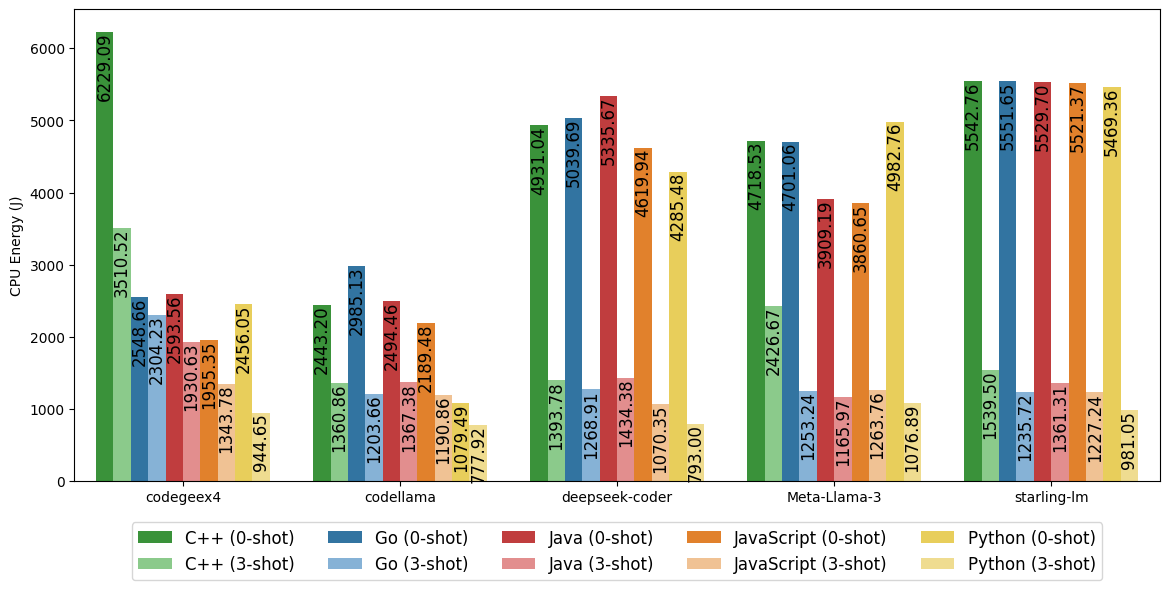

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_0_averages e df_3_averages já estão definidos

# Adicionar a coluna de contexto
df_0_averages['Context'] = '0-shot'
df_3_averages['Context'] = '3-shot'

# Ordem personalizada para a coluna 'LLM' (novos valores)
llm_order = [
    "codegeex4",
    "codellama",
    "deepseek-coder",
    "Meta-Llama-3",
    "starling-lm"
]

# Substituir os valores na coluna 'LLM' nos dataframes originais
mapping = {
    "codegeex4-all-9b-Q6_K_L": "codegeex4",
    "codellama-7b-instruct.Q5_K_M": "codellama",
    "deepseek-coder-6.7b-instruct.Q5_K_M": "deepseek-coder",
    "Meta-Llama-3-8B-Instruct-Q6_K": "Meta-Llama-3",
    "starling-lm-7b-alpha.Q5_K_S": "starling-lm"
}

df_0_averages['LLM'] = df_0_averages['LLM'].replace(mapping)
df_3_averages['LLM'] = df_3_averages['LLM'].replace(mapping)

# Concatenar os dataframes
df_combined = pd.concat([df_0_averages, df_3_averages], ignore_index=True)

# Converter a coluna 'LLM' para uma categoria ordenada
df_combined['LLM'] = pd.Categorical(df_combined['LLM'], categories=llm_order, ordered=True)

# Criar uma nova coluna para rótulos combinados
df_combined['Language (Context)'] = df_combined['Programming Language'] + ' (' + df_combined['Context'] + ')'

# Definir a paleta base para cada linguagem
base_palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

light_palette = {
    'Go': '#79b4e3',        # Azul claro
    'Python': '#ffe680',    # Amarelo claro
    'Java': '#f08080',      # Vermelho claro
    'JavaScript': '#ffc285', # Laranja claro
    'C++': '#81d481'        # Verde claro
}


# Gerar tons claros e escuros para cada linguagem
palette = {}
for lang, base_color in base_palette.items():
    palette[f'{lang} (0-shot)'] = base_palette[lang]
    palette[f'{lang} (3-shot)'] = light_palette[lang]

# Definir a ordem desejada para as categorias combinadas
combined_order = [
    "C++ (0-shot)", "C++ (3-shot)", 
    "Go (0-shot)", "Go (3-shot)",
    "Java (0-shot)", "Java (3-shot)",
    "JavaScript (0-shot)", "JavaScript (3-shot)",
    "Python (0-shot)", "Python (3-shot)",
]

# Criar o gráfico
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_combined,
    x='LLM',
    y='CPU Energy (J)',
    hue='Language (Context)',
    palette=palette,  # Utilizar a paleta personalizada
    hue_order=combined_order  # Ordem personalizada
)

# Adicionar títulos e rótulos
plt.title('')
plt.xlabel('')
plt.ylabel('CPU Energy (J)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=5, fontsize=12)

# Adicionar anotações para valores
for p in barplot.patches:
    # Add labels below the bars with two decimal places
    barplot.text(p.get_x() + p.get_width() / 2, 
                 p.get_height(),  # Position below the bar, adjust as necessary
                 f'{p.get_height():.2f}', 
                 ha='center', va='top', 
                 fontsize=12, color='black', 
                 rotation=90)  # Rotate labels if desired

# Ajustar layout
plt.grid(False)
plt.tight_layout()

#plt.savefig('humanevalx_energy.pdf', dpi=300, bbox_inches='tight')  # Ajuste o nome e formato conforme necessário

# Mostrar o gráfico
plt.show()

#### [PAPER] Time (0-shot and 3-shot)

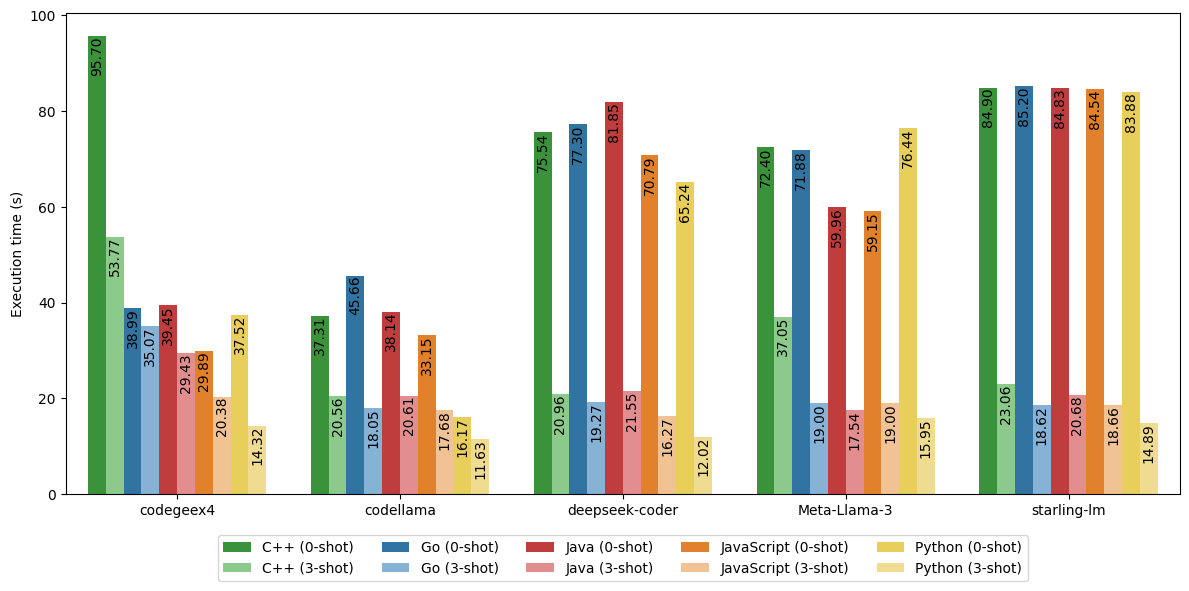

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_0_averages e df_3_averages já estão definidos

# Adicionar a coluna de contexto
df_0_averages['Context'] = '0-shot'
df_3_averages['Context'] = '3-shot'

# Ordem personalizada para a coluna 'LLM' (novos valores)
llm_order = [
    "codegeex4",
    "codellama",
    "deepseek-coder",
    "Meta-Llama-3",
    "starling-lm"
]

# Substituir os valores na coluna 'LLM' nos dataframes originais
mapping = {
    "codegeex4-all-9b-Q6_K_L": "codegeex4",
    "codellama-7b-instruct.Q5_K_M": "codellama",
    "deepseek-coder-6.7b-instruct.Q5_K_M": "deepseek-coder",
    "Meta-Llama-3-8B-Instruct-Q6_K": "Meta-Llama-3",
    "starling-lm-7b-alpha.Q5_K_S": "starling-lm"
}

df_0_averages['LLM'] = df_0_averages['LLM'].replace(mapping)
df_3_averages['LLM'] = df_3_averages['LLM'].replace(mapping)

# Concatenar os dataframes
df_combined = pd.concat([df_0_averages, df_3_averages], ignore_index=True)

# Converter a coluna 'LLM' para uma categoria ordenada
df_combined['LLM'] = pd.Categorical(df_combined['LLM'], categories=llm_order, ordered=True)

# Criar uma nova coluna para rótulos combinados
df_combined['Language (Context)'] = df_combined['Programming Language'] + ' (' + df_combined['Context'] + ')'

# Definir a paleta base para cada linguagem
base_palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

light_palette = {
    'Go': '#79b4e3',        # Azul claro
    'Python': '#ffe680',    # Amarelo claro
    'Java': '#f08080',      # Vermelho claro
    'JavaScript': '#ffc285', # Laranja claro
    'C++': '#81d481'        # Verde claro
}


# Gerar tons claros e escuros para cada linguagem
palette = {}
for lang, base_color in base_palette.items():
    palette[f'{lang} (0-shot)'] = base_palette[lang]
    palette[f'{lang} (3-shot)'] = light_palette[lang]

# Definir a ordem desejada para as categorias combinadas
combined_order = [
    "C++ (0-shot)", "C++ (3-shot)", 
    "Go (0-shot)", "Go (3-shot)",
    "Java (0-shot)", "Java (3-shot)",
    "JavaScript (0-shot)", "JavaScript (3-shot)",
    "Python (0-shot)", "Python (3-shot)",
]

# Criar o gráfico
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_combined,
    x='LLM',
    y='Execution time (s)',
    hue='Language (Context)',
    palette=palette,  # Utilizar a paleta personalizada
    hue_order=combined_order  # Ordem personalizada
)

# Adicionar títulos e rótulos
plt.title('')
plt.xlabel('')
plt.ylabel('Execution time (s)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=5)

# Adicionar anotações para valores
for p in barplot.patches:
    # Add labels below the bars with two decimal places
    barplot.text(p.get_x() + p.get_width() / 2, 
                 p.get_height(),  # Position below the bar, adjust as necessary
                 f'{p.get_height():.2f}', 
                 ha='center', va='top', 
                 fontsize=10, color='black', 
                 rotation=90)  # Rotate labels if desired

# Ajustar layout
plt.grid(False)
plt.tight_layout()

#plt.savefig('humanevalx_time.pdf', dpi=300, bbox_inches='tight')  # Ajuste o nome e formato conforme necessário

# Mostrar o gráfico
plt.show()

#### [PAPER] Pass@1

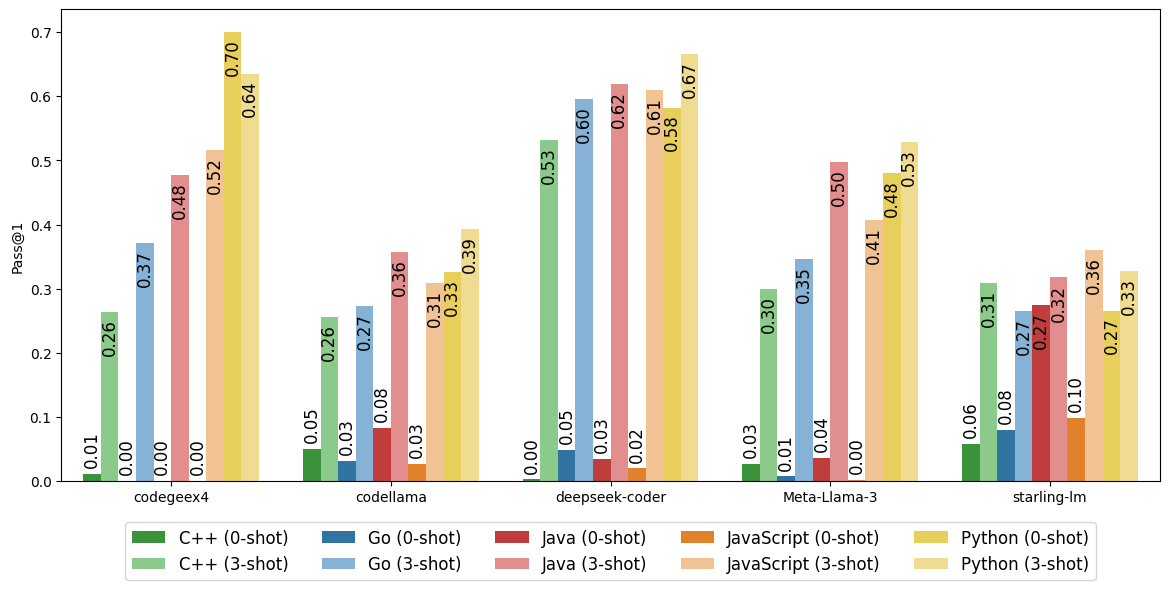

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

METRIC = "Pass@1"

# Supondo que df_0_averages e df_3_averages já estão definidos

# Adicionar a coluna de contexto
df_0_averages['Context'] = '0-shot'
df_3_averages['Context'] = '3-shot'

# Ordem personalizada para a coluna 'LLM' (novos valores)
llm_order = [
    "codegeex4",
    "codellama",
    "deepseek-coder",
    "Meta-Llama-3",
    "starling-lm"
]

# Substituir os valores na coluna 'LLM' nos dataframes originais
mapping = {
    "codegeex4-all-9b-Q6_K_L": "codegeex4",
    "codellama-7b-instruct.Q5_K_M": "codellama",
    "deepseek-coder-6.7b-instruct.Q5_K_M": "deepseek-coder",
    "Meta-Llama-3-8B-Instruct-Q6_K": "Meta-Llama-3",
    "starling-lm-7b-alpha.Q5_K_S": "starling-lm"
}

df_0_averages['LLM'] = df_0_averages['LLM'].replace(mapping)
df_3_averages['LLM'] = df_3_averages['LLM'].replace(mapping)

# Concatenar os dataframes
df_combined = pd.concat([df_0_averages, df_3_averages], ignore_index=True)

# Converter a coluna 'LLM' para uma categoria ordenada
df_combined['LLM'] = pd.Categorical(df_combined['LLM'], categories=llm_order, ordered=True)

# Criar uma nova coluna para rótulos combinados
df_combined['Language (Context)'] = df_combined['Programming Language'] + ' (' + df_combined['Context'] + ')'

# Definir a paleta base para cada linguagem
base_palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

light_palette = {
    'Go': '#79b4e3',        # Azul claro
    'Python': '#ffe680',    # Amarelo claro
    'Java': '#f08080',      # Vermelho claro
    'JavaScript': '#ffc285', # Laranja claro
    'C++': '#81d481'        # Verde claro
}

# Gerar tons claros e escuros para cada linguagem
palette = {}
for lang, base_color in base_palette.items():
    palette[f'{lang} (0-shot)'] = base_palette[lang]
    palette[f'{lang} (3-shot)'] = light_palette[lang]

# Definir a ordem desejada para as categorias combinadas
combined_order = [
    "C++ (0-shot)", "C++ (3-shot)", 
    "Go (0-shot)", "Go (3-shot)",
    "Java (0-shot)", "Java (3-shot)",
    "JavaScript (0-shot)", "JavaScript (3-shot)",
    "Python (0-shot)", "Python (3-shot)",
]

# Criar o gráfico
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_combined,
    x='LLM',
    y=METRIC,
    hue='Language (Context)',
    palette=palette,  # Utilizar a paleta personalizada
    hue_order=combined_order  # Ordem personalizada
)

# Adicionar títulos e rótulos
plt.title('')
plt.xlabel('')
plt.ylabel(METRIC)

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=5, fontsize=12)

# Adicionar anotações para valores
for p in barplot.patches:
    # Valor da barra
    value = p.get_height()
    
    # Posição da label
    if value < 0.1:
        va = 'bottom'
        y_offset = 0.01  # Posição acima da barra
    else:
        va = 'top'
        y_offset = -0.01  # Posição no topo da barra

    # Adicionar a label
    barplot.text(p.get_x() + p.get_width() / 2, 
                 value + y_offset, 
                 f'{value:.2f}', 
                 ha='center', va=va, rotation=90,
                 fontsize=12, color='black')
    
# Ajustar layout
plt.grid(False)
plt.tight_layout()

# Salvar o gráfico
#plt.savefig('humanevalx_pass1.pdf', dpi=300, bbox_inches='tight')

# Mostrar o gráfico
plt.show()


#### [PAPER] Pass@10

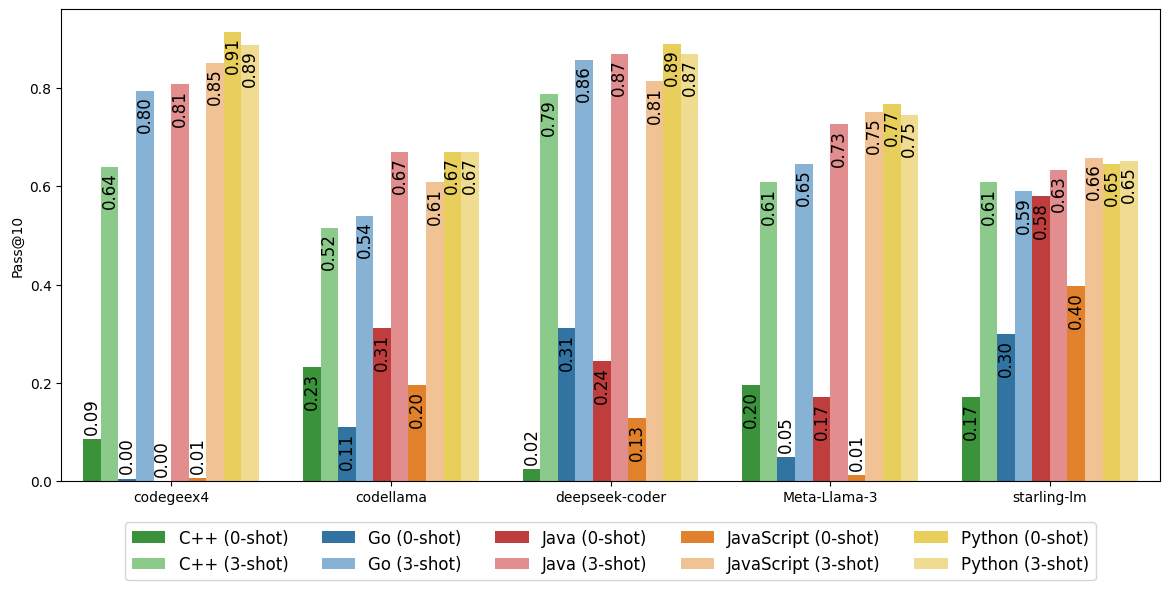

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

METRIC = "Pass@10"

# Supondo que df_0_averages e df_3_averages já estão definidos

# Adicionar a coluna de contexto
df_0_averages['Context'] = '0-shot'
df_3_averages['Context'] = '3-shot'

# Ordem personalizada para a coluna 'LLM' (novos valores)
llm_order = [
    "codegeex4",
    "codellama",
    "deepseek-coder",
    "Meta-Llama-3",
    "starling-lm"
]

# Substituir os valores na coluna 'LLM' nos dataframes originais
mapping = {
    "codegeex4-all-9b-Q6_K_L": "codegeex4",
    "codellama-7b-instruct.Q5_K_M": "codellama",
    "deepseek-coder-6.7b-instruct.Q5_K_M": "deepseek-coder",
    "Meta-Llama-3-8B-Instruct-Q6_K": "Meta-Llama-3",
    "starling-lm-7b-alpha.Q5_K_S": "starling-lm"
}

df_0_averages['LLM'] = df_0_averages['LLM'].replace(mapping)
df_3_averages['LLM'] = df_3_averages['LLM'].replace(mapping)

# Concatenar os dataframes
df_combined = pd.concat([df_0_averages, df_3_averages], ignore_index=True)

# Converter a coluna 'LLM' para uma categoria ordenada
df_combined['LLM'] = pd.Categorical(df_combined['LLM'], categories=llm_order, ordered=True)

# Criar uma nova coluna para rótulos combinados
df_combined['Language (Context)'] = df_combined['Programming Language'] + ' (' + df_combined['Context'] + ')'

# Definir a paleta base para cada linguagem
base_palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

light_palette = {
    'Go': '#79b4e3',        # Azul claro
    'Python': '#ffe680',    # Amarelo claro
    'Java': '#f08080',      # Vermelho claro
    'JavaScript': '#ffc285', # Laranja claro
    'C++': '#81d481'        # Verde claro
}

# Gerar tons claros e escuros para cada linguagem
palette = {}
for lang, base_color in base_palette.items():
    palette[f'{lang} (0-shot)'] = base_palette[lang]
    palette[f'{lang} (3-shot)'] = light_palette[lang]

# Definir a ordem desejada para as categorias combinadas
combined_order = [
    "C++ (0-shot)", "C++ (3-shot)", 
    "Go (0-shot)", "Go (3-shot)",
    "Java (0-shot)", "Java (3-shot)",
    "JavaScript (0-shot)", "JavaScript (3-shot)",
    "Python (0-shot)", "Python (3-shot)",
]

# Criar o gráfico
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_combined,
    x='LLM',
    y=METRIC,
    hue='Language (Context)',
    palette=palette,  # Utilizar a paleta personalizada
    hue_order=combined_order  # Ordem personalizada
)

# Adicionar títulos e rótulos
plt.title('')
plt.xlabel('')
plt.ylabel(METRIC)

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=5, fontsize=12)

# Adicionar anotações para valores
for p in barplot.patches:
    # Valor da barra
    value = p.get_height()
    
    # Posição da label
    if value < 0.1:
        va = 'bottom'
        y_offset = 0.01  # Posição acima da barra
    else:
        va = 'top'
        y_offset = -0.01  # Posição no topo da barra

    # Adicionar a label
    barplot.text(p.get_x() + p.get_width() / 2, 
                 value + y_offset, 
                 f'{value:.2f}', 
                 ha='center', va=va, rotation=90,
                 fontsize=12, color='black')
    
# Ajustar layout
plt.grid(False)
plt.tight_layout()

# Salvar o gráfico
#plt.savefig('humanevalx_pass10.pdf', dpi=300, bbox_inches='tight')

# Mostrar o gráfico
plt.show()


#### [Appendix] BLEU

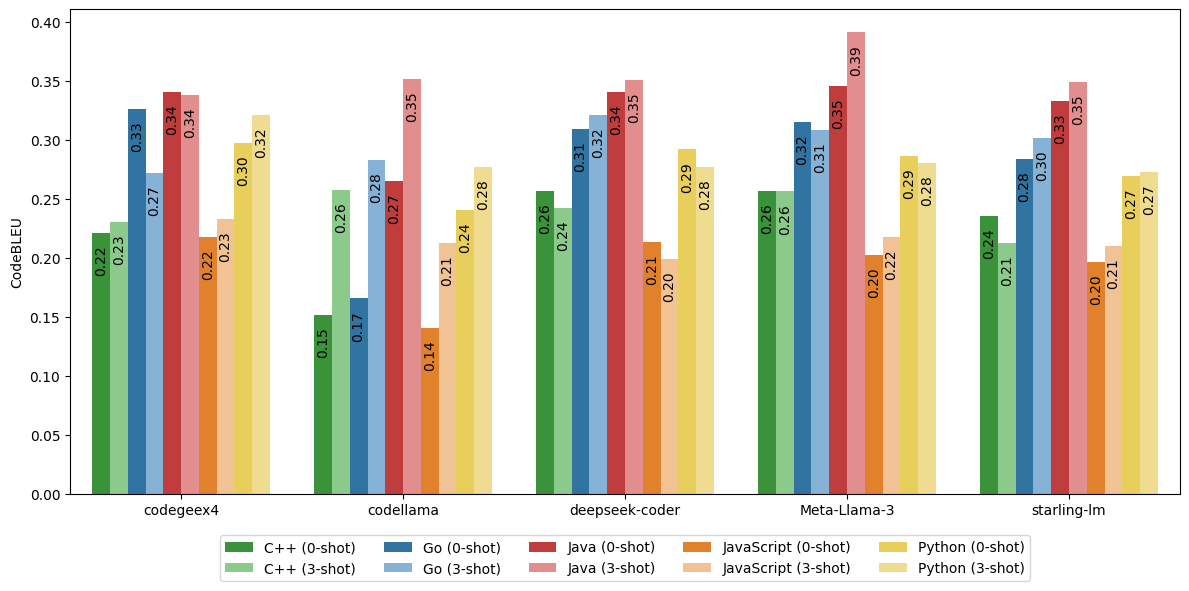

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

METRIC = "CodeBLEU"

# Supondo que df_0_averages e df_3_averages já estão definidos

# Adicionar a coluna de contexto
df_0_averages['Context'] = '0-shot'
df_3_averages['Context'] = '3-shot'

# Ordem personalizada para a coluna 'LLM' (novos valores)
llm_order = [
    "codegeex4",
    "codellama",
    "deepseek-coder",
    "Meta-Llama-3",
    "starling-lm"
]

# Substituir os valores na coluna 'LLM' nos dataframes originais
mapping = {
    "codegeex4-all-9b-Q6_K_L": "codegeex4",
    "codellama-7b-instruct.Q5_K_M": "codellama",
    "deepseek-coder-6.7b-instruct.Q5_K_M": "deepseek-coder",
    "Meta-Llama-3-8B-Instruct-Q6_K": "Meta-Llama-3",
    "starling-lm-7b-alpha.Q5_K_S": "starling-lm"
}

df_0_averages['LLM'] = df_0_averages['LLM'].replace(mapping)
df_3_averages['LLM'] = df_3_averages['LLM'].replace(mapping)

# Concatenar os dataframes
df_combined = pd.concat([df_0_averages, df_3_averages], ignore_index=True)

# Converter a coluna 'LLM' para uma categoria ordenada
df_combined['LLM'] = pd.Categorical(df_combined['LLM'], categories=llm_order, ordered=True)

# Criar uma nova coluna para rótulos combinados
df_combined['Language (Context)'] = df_combined['Programming Language'] + ' (' + df_combined['Context'] + ')'

# Definir a paleta base para cada linguagem
base_palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

light_palette = {
    'Go': '#79b4e3',        # Azul claro
    'Python': '#ffe680',    # Amarelo claro
    'Java': '#f08080',      # Vermelho claro
    'JavaScript': '#ffc285', # Laranja claro
    'C++': '#81d481'        # Verde claro
}

# Gerar tons claros e escuros para cada linguagem
palette = {}
for lang, base_color in base_palette.items():
    palette[f'{lang} (0-shot)'] = base_palette[lang]
    palette[f'{lang} (3-shot)'] = light_palette[lang]

# Definir a ordem desejada para as categorias combinadas
combined_order = [
    "C++ (0-shot)", "C++ (3-shot)", 
    "Go (0-shot)", "Go (3-shot)",
    "Java (0-shot)", "Java (3-shot)",
    "JavaScript (0-shot)", "JavaScript (3-shot)",
    "Python (0-shot)", "Python (3-shot)",
]

# Criar o gráfico
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_combined,
    x='LLM',
    y=METRIC,
    hue='Language (Context)',
    palette=palette,  # Utilizar a paleta personalizada
    hue_order=combined_order  # Ordem personalizada
)

# Adicionar títulos e rótulos
plt.title('')
plt.xlabel('')
plt.ylabel(METRIC)

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=5)

# Adicionar anotações para valores
for p in barplot.patches:
    # Valor da barra
    value = p.get_height()
    
    # Posição da label
    if value < 0.055:
        va = 'bottom'
        y_offset = 0.01  # Posição acima da barra
    else:
        va = 'top'
        y_offset = -0.01  # Posição no topo da barra

    # Adicionar a label
    barplot.text(p.get_x() + p.get_width() / 2, 
                 value + y_offset, 
                 f'{value:.2f}', 
                 ha='center', va=va, rotation=90,
                 fontsize=10, color='black')
    
# Ajustar layout
plt.grid(False)
plt.tight_layout()

# Salvar o gráfico
#plt.savefig(f'humanevalx_{METRIC}.png', dpi=300, bbox_inches='tight')

# Mostrar o gráfico
plt.show()

#### Compare CPU Energy for all LLMs (0-shot and 3-shot)

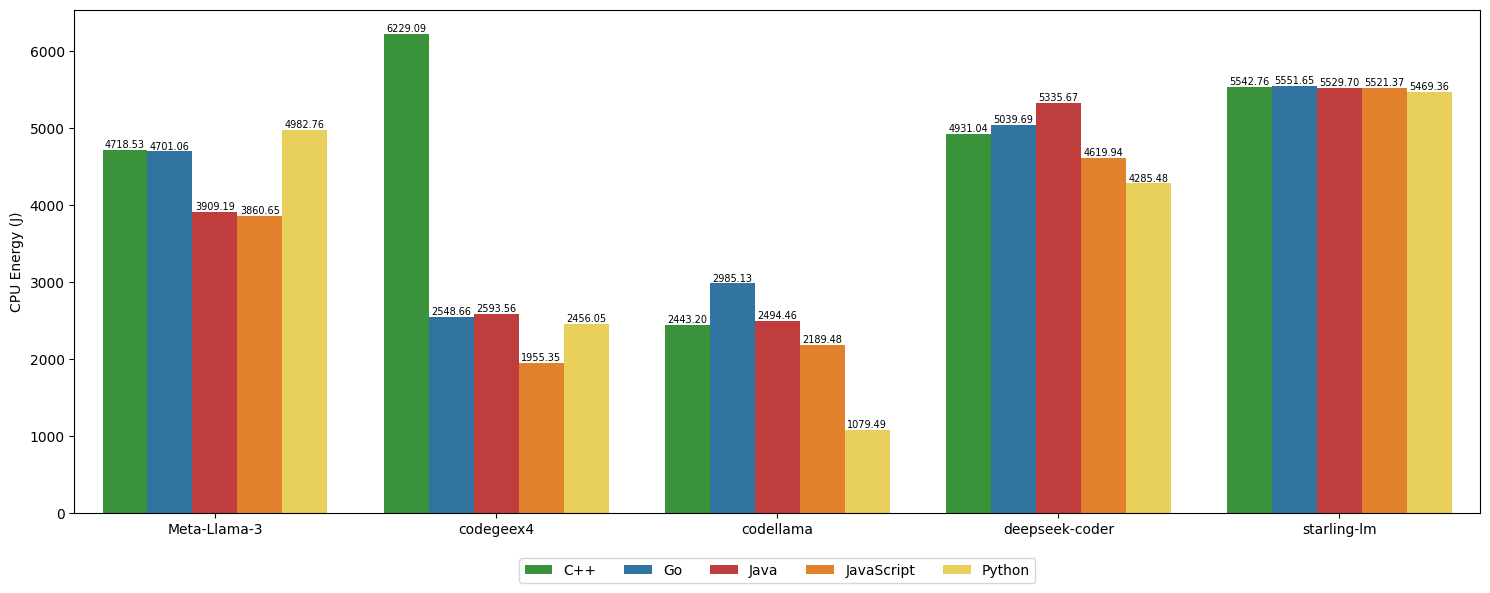

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='CPU Energy (J)', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('CPU Energy Consumption by LLM and Programming Language (0-shot)')
plt.title('')

plt.xlabel('')
plt.ylabel('CPU Energy (J)')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=7)

# Show the plot
plt.grid(False)
plt.tight_layout()

plt.show()


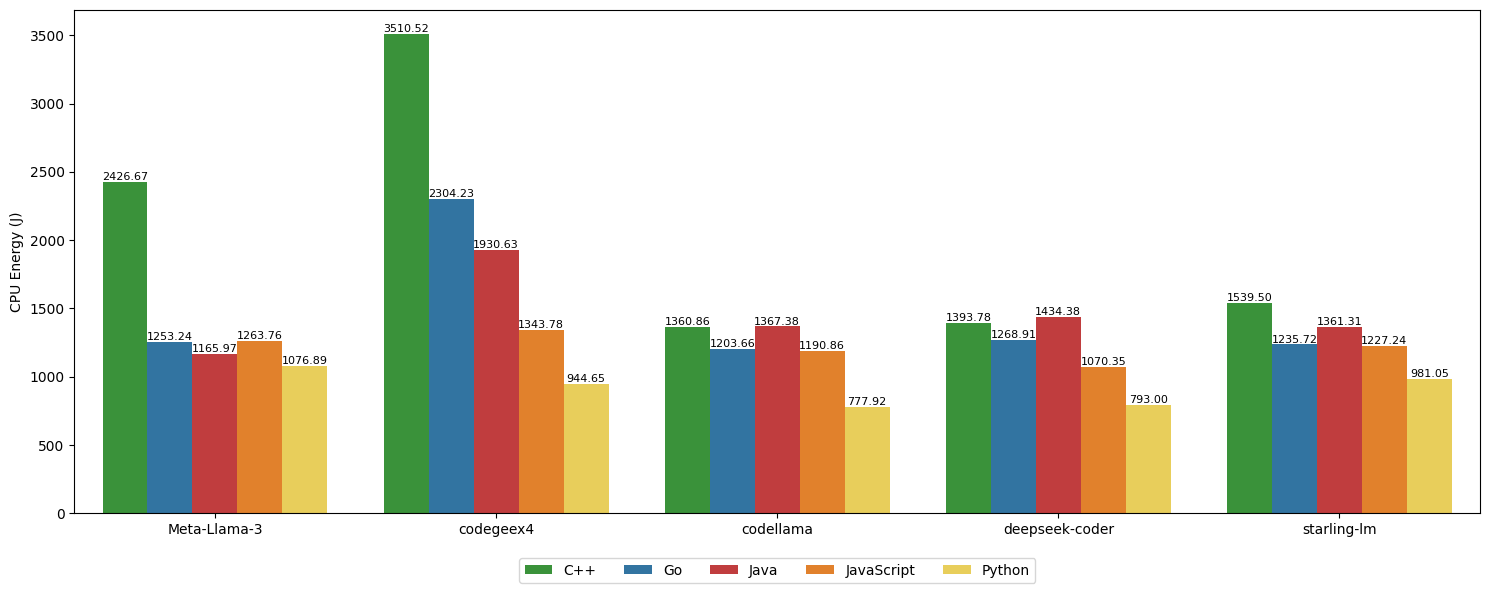

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, 
                       x='LLM', 
                       y='CPU Energy (J)', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('CPU Energy Consumption by LLM and Programming Language (3-shot)')
plt.title('')
plt.xlabel('')
plt.ylabel('CPU Energy (J)')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=8)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("humanevalx_energy_3shot.png")
plt.show()


#### Compare Execution time for all LLMs (0-shot and 3-shot)

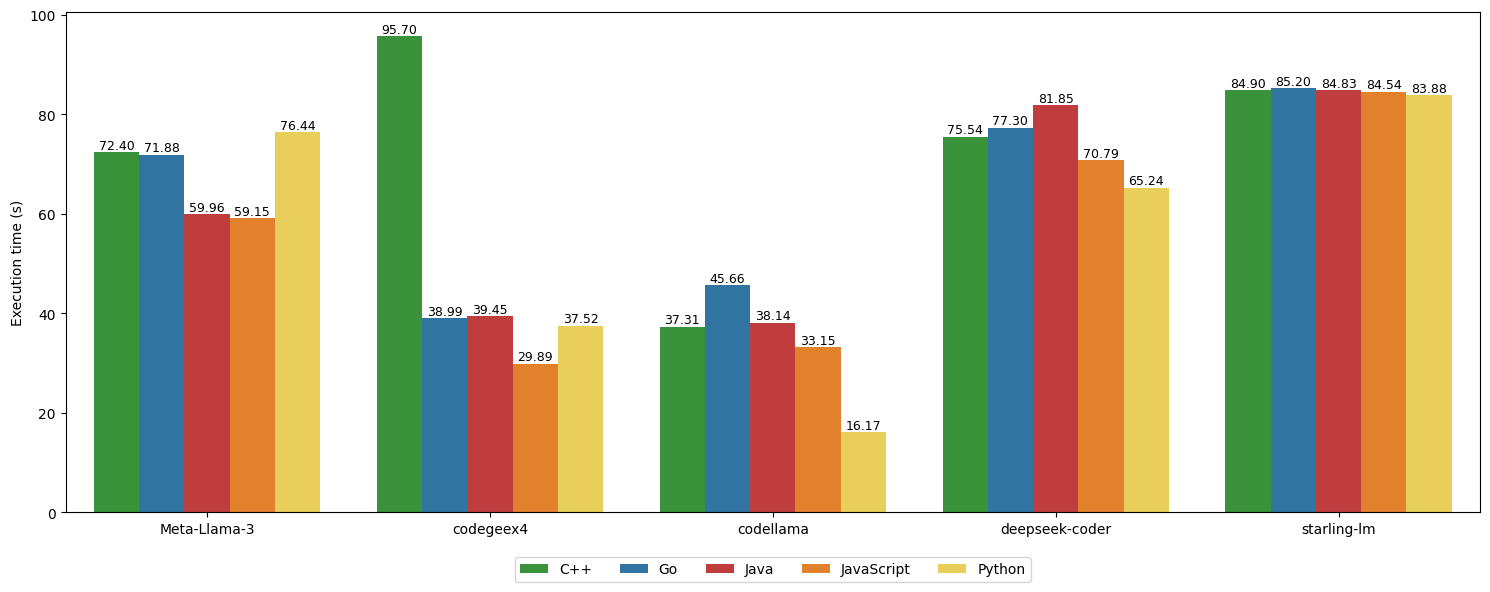

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir uma paleta de cores para as linguagens de programação
palette = {
    'Go': '#1f77b4',        # Azul
    'Python': '#ffdd44',    # Amarelo
    'Java': '#d62728',      # Vermelho
    'JavaScript': '#ff7f0e', # Laranja
    'C++': '#2ca02c'        # Verde
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Criar o barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, x='LLM', y='Execution time (s)', hue='Programming Language', palette=palette,
                      hue_order=programming_languages_order)

# Adicionar títulos e rótulos
#plt.title('Execution time by LLM and Programming Language (0-shot)')
plt.title('')

plt.xlabel('')
plt.ylabel('Execution time (s)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=9)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.grid(False)
plt.tight_layout()
#plt.savefig("humanevalx_time_0shot.png")
plt.show()

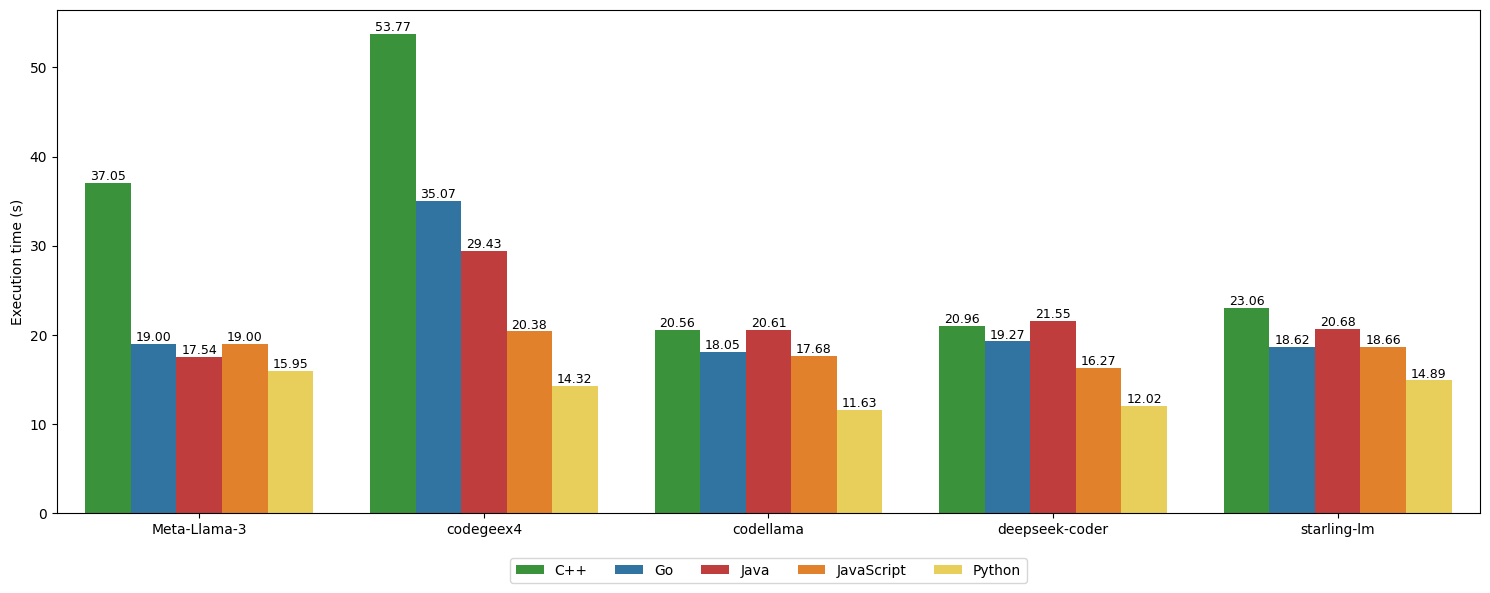

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir uma paleta de cores para as linguagens de programação
palette = {
    'Go': '#1f77b4',        # Azul
    'Python': '#ffdd44',    # Amarelo
    'Java': '#d62728',      # Vermelho
    'JavaScript': '#ff7f0e', # Laranja
    'C++': '#2ca02c'        # Verde
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Criar o barplot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, x='LLM', y='Execution time (s)', hue='Programming Language', palette=palette,
                      hue_order=programming_languages_order)

# Adicionar títulos e rótulos
#plt.title('Execution time by LLM and Programming Language (3-shot)')
plt.title('')
plt.xlabel('')
plt.ylabel('Execution time (s)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Adicionar rótulos em cima de cada barra com tamanho de letra reduzido
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=9)  # Ajuste o valor de fontsize conforme necessário

# Mostrar o gráfico
plt.grid(False)
plt.tight_layout()
#plt.savefig("humanevalx_time_3shot.png")
plt.show()

#### [APPENDIX] Differences from 0-shot to 3-shot

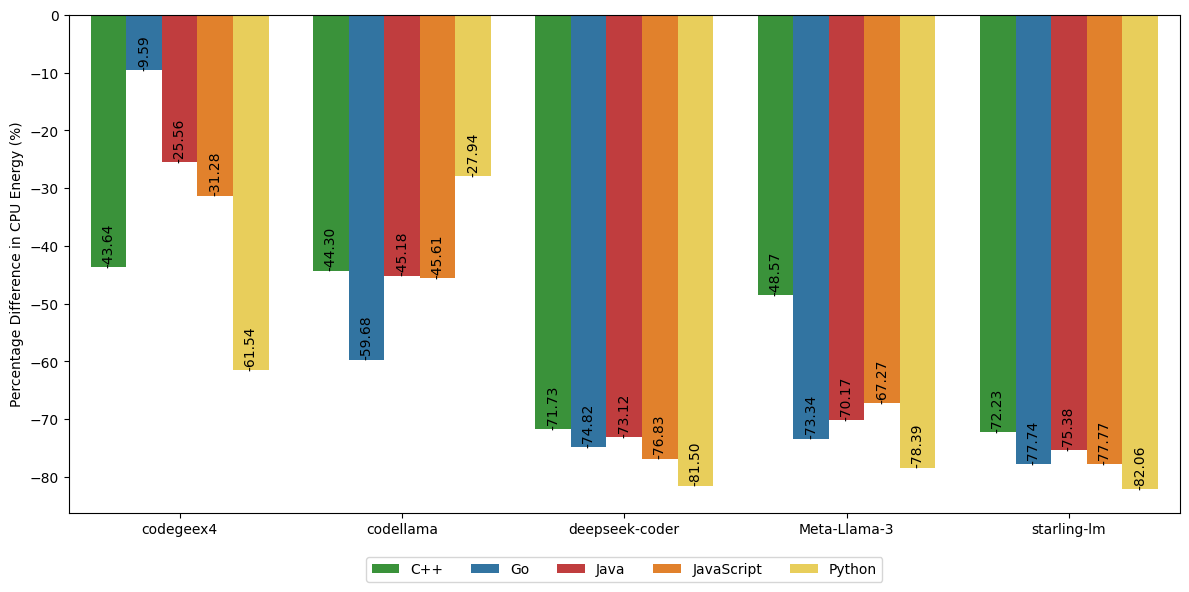

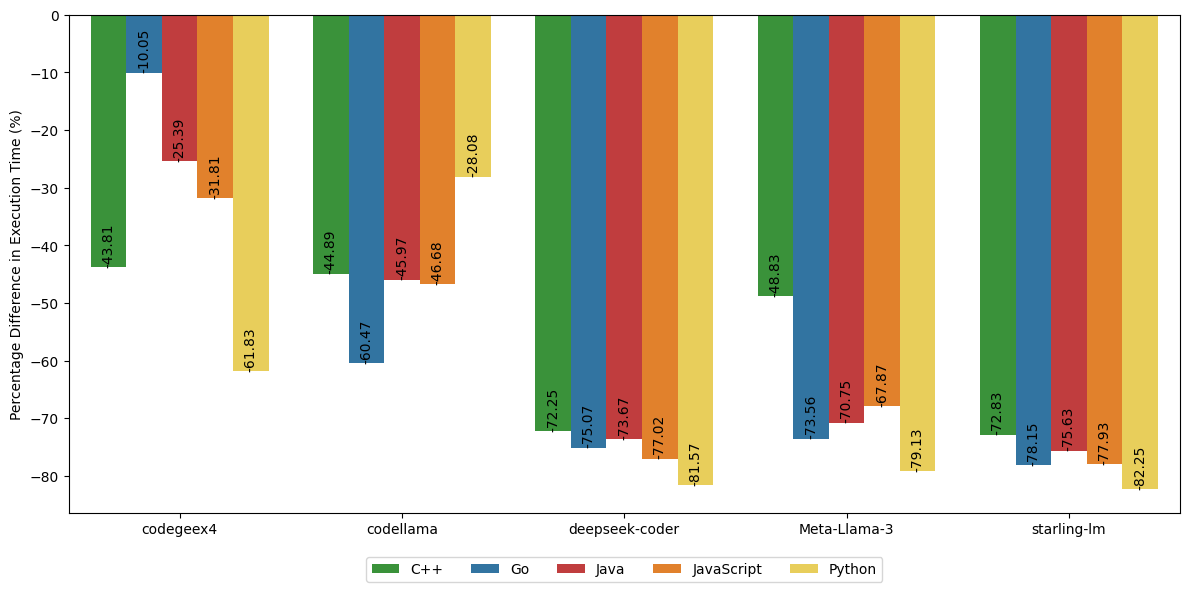

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ordem personalizada para a coluna 'LLM'
llm_order = [
    "codegeex4",
    "codellama",
    "deepseek-coder",
    "Meta-Llama-3",
    "starling-lm"
]

# Substituir os valores na coluna 'LLM' nos dataframes originais
mapping = {
    "codegeex4-all-9b-Q6_K_L": "codegeex4",
    "codellama-7b-instruct.Q5_K_M": "codellama",
    "deepseek-coder-6.7b-instruct.Q5_K_M": "deepseek-coder",
    "Meta-Llama-3-8B-Instruct-Q6_K": "Meta-Llama-3",
    "starling-lm-7b-alpha.Q5_K_S": "starling-lm"
}

df_0_averages['LLM'] = df_0_averages['LLM'].replace(mapping)
df_3_averages['LLM'] = df_3_averages['LLM'].replace(mapping)

palette = {
    'Go': '#1f77b4',        # Azul
    'Python': '#ffdd44',    # Amarelo
    'Java': '#d62728',      # Vermelho
    'JavaScript': '#ff7f0e', # Laranja
    'C++': '#2ca02c'        # Verde
}

# Calcular a diferença para CPU Energy e Execution Time
df_merged = pd.merge(df_0_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     df_3_averages[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)']],
                     on=['LLM', 'Programming Language'],
                     suffixes=('_0', '_3'))

# Calcular a diferença percentual
df_merged['CPU Energy Percentage Difference (%)'] = ((df_merged['CPU Energy (J)_3'] - df_merged['CPU Energy (J)_0']) / df_merged['CPU Energy (J)_0']) * 100
df_merged['Execution Time Percentage Difference (%)'] = ((df_merged['Execution time (s)_3'] - df_merged['Execution time (s)_0']) / df_merged['Execution time (s)_0']) * 100

# Corrigir possíveis NaN e infinitos
df_merged.fillna(0, inplace=True)
df_merged.replace([float('inf'), -float('inf')], 0, inplace=True)

# Criar gráfico para CPU Energy Percentage Difference
plt.figure(figsize=(12, 6))
barplot_energy = sns.barplot(
    data=df_merged, 
    x='LLM', 
    y='CPU Energy Percentage Difference (%)', 
    palette=palette, 
    hue='Programming Language',
    order=llm_order  # Definir a ordem correta
)

plt.xlabel('')
plt.ylabel('Percentage Difference in CPU Energy (%)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Adicionar anotações para valores
for p in barplot_energy.patches:
    value = p.get_height()
    y_offset = max(0.01, value * 0.05)  # Ajuste dinâmico
    barplot_energy.text(p.get_x() + p.get_width() / 2, 
                        value + y_offset, 
                        f'{value:.2f}', 
                        ha='center', va='bottom', rotation=90,
                        fontsize=10, color='black')

plt.grid(False)
plt.tight_layout()
#plt.savefig(f'humanevalx_diff_energy.png', dpi=300, bbox_inches='tight')
plt.show()

# Criar gráfico para Execution Time Percentage Difference
plt.figure(figsize=(12, 6))
barplot_time = sns.barplot(
    data=df_merged, 
    x='LLM', 
    y='Execution Time Percentage Difference (%)', 
    palette=palette, 
    hue='Programming Language',
    order=llm_order  # Definir a ordem correta
)

plt.xlabel('')
plt.ylabel('Percentage Difference in Execution Time (%)')

# Posicionar a legenda abaixo do gráfico
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Adicionar anotações para valores
for p in barplot_time.patches:
    value = p.get_height()
    y_offset = max(0.01, value * 0.05)  # Ajuste dinâmico
    barplot_time.text(p.get_x() + p.get_width() / 2, 
                      value + y_offset, 
                      f'{value:.2f}', 
                      ha='center', va='bottom', rotation=90,
                      fontsize=10, color='black')

plt.grid(False)
plt.tight_layout()
#plt.savefig(f'humanevalx_diff_time.png', dpi=300, bbox_inches='tight')
plt.show()


In [130]:
df_0_averages_mean = df_0_averages.groupby('LLM', as_index=False).mean()
df_3_averages_mean = df_3_averages.groupby('LLM', as_index=False).mean()

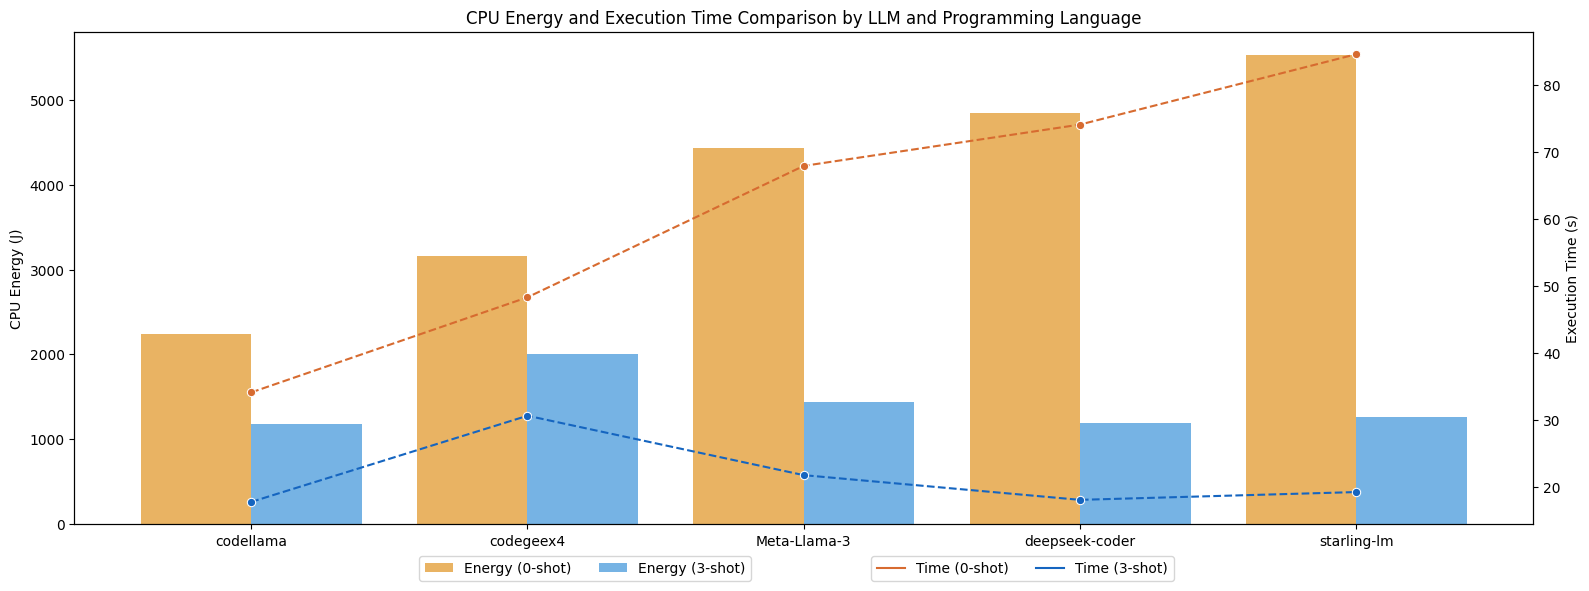

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_0_averages e df_3_averages já estão carregados

# Adicionar uma coluna para indicar o dataframe de origem
df_0_averages_mean['Source'] = '0-shot'
df_3_averages_mean['Source'] = '3-shot'

# Concatenar os DataFrames
merged_df = pd.concat([
    df_0_averages_mean[['LLM', 'CPU Energy (J)', 'Execution time (s)', 'Source']],
    df_3_averages_mean[['LLM', 'CPU Energy (J)', 'Execution time (s)', 'Source']]
], ignore_index=True)

# Calcular a média de Execution time (s) por LLM para ordenar
mean_execution_time = merged_df.groupby('LLM')['Execution time (s)'].mean()

# Ordenar os LLMs de acordo com o Execution time (s)
ordered_llms = mean_execution_time.sort_values().index

# Atualizar a ordem do eixo x de acordo com o tempo de execução
merged_df['LLM'] = pd.Categorical(merged_df['LLM'], categories=ordered_llms, ordered=True)

# Criar a figura e os eixos
fig, ax1 = plt.subplots(figsize=(16, 6))

# Definir cores claras para as barras
bar_colors = ['#FFB74D', '#64B5F6']  # Laranja claro para '0-shot' e azul claro para '3-shot'

# Criar as barras para CPU Energy com cores claras
barplot = sns.barplot(data=merged_df, x='LLM', y='CPU Energy (J)', hue='Source', ax=ax1, palette=bar_colors)

# Remover o grid do eixo ax1 (barras)
ax1.grid(False)

# Adicionar títulos e rótulos
plt.title('CPU Energy and Execution Time Comparison by LLM and Programming Language')
ax1.set_xlabel('')
ax1.set_ylabel('CPU Energy (J)')

# Criar o segundo eixo y para Execution Time
ax2 = ax1.twinx()

# Definir cores escuras para as linhas
line_colors = ['#D76B30', '#1565C0']  # Laranja escuro para '0-shot' e azul escuro para '3-shot'

# Criar o lineplot para Execution Time
sns.lineplot(data=merged_df, x='LLM', y='Execution time (s)', hue='Source',
             marker='o', ax=ax2, palette=line_colors, linestyle='--')

# Remover o grid do eixo ax2 (linhas)
ax2.grid(False)

# Adicionar rótulos e título ao eixo y da direita
ax2.set_ylabel('Execution Time (s)')

# Obter handles e labels das legendas
handles1, labels1 = ax1.get_legend_handles_labels()  # Para o barplot
handles2, labels2 = ax2.get_legend_handles_labels()  # Para o lineplot

# Combinar handles e labels
handles = handles1 + handles2
labels = ['Energy (0-shot)', 'Energy (3-shot)', 'Time (0-shot)', 'Time (3-shot)']

# Adicionar legendas com as mesmas posições do seu exemplo
ax1.legend(handles1, ['Energy (0-shot)', 'Energy (3-shot)'], bbox_to_anchor=(0.35, -0.05), loc='upper center', ncol=2)
ax2.legend(handles2, ['Time (0-shot)', 'Time (3-shot)'], bbox_to_anchor=(0.65, -0.05), loc='upper center', ncol=2)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


#### Compare pass@k and BLEU scores

##### For each Programming language

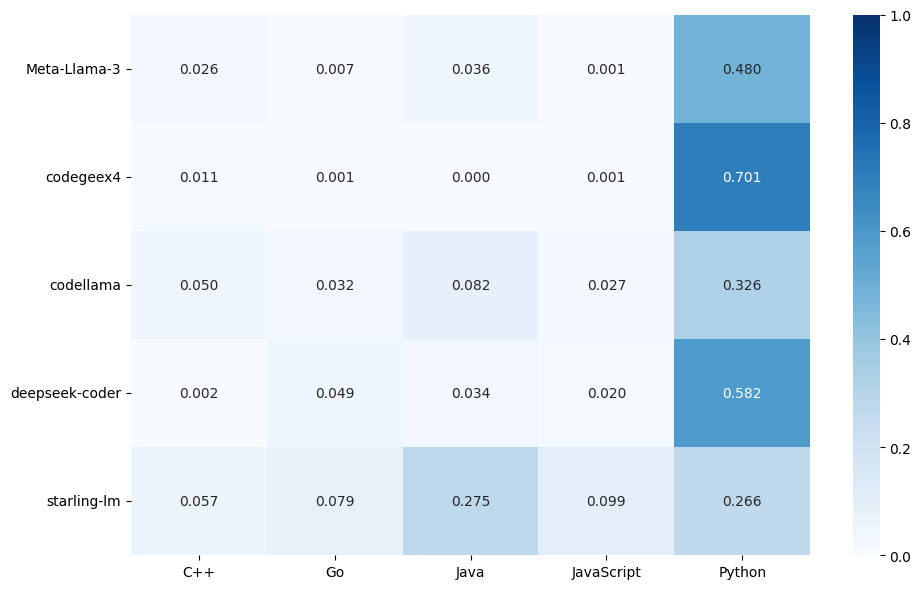

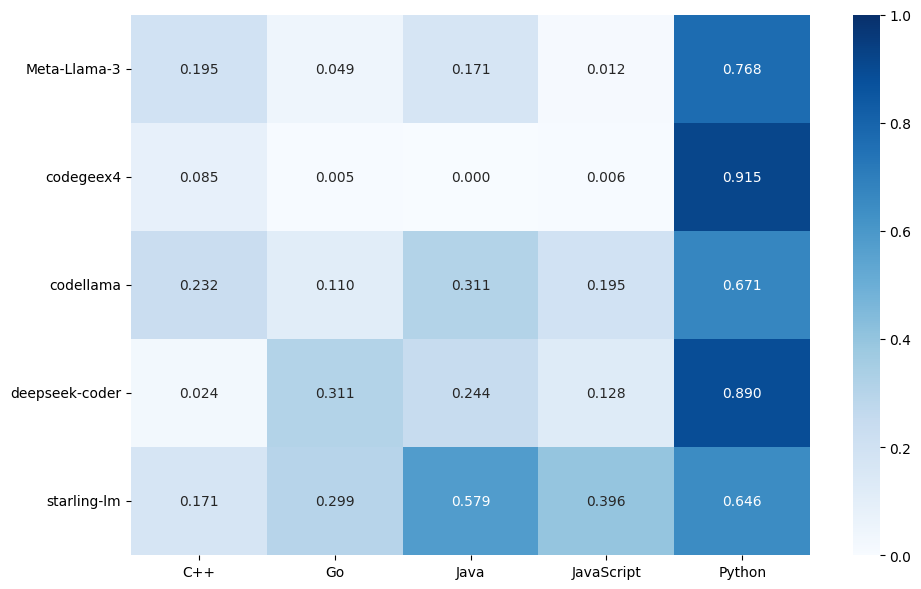

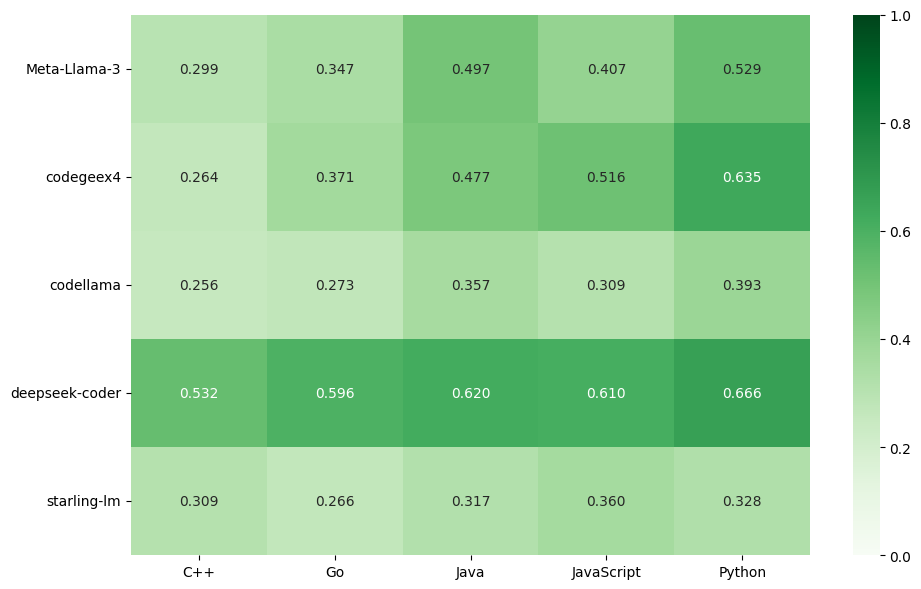

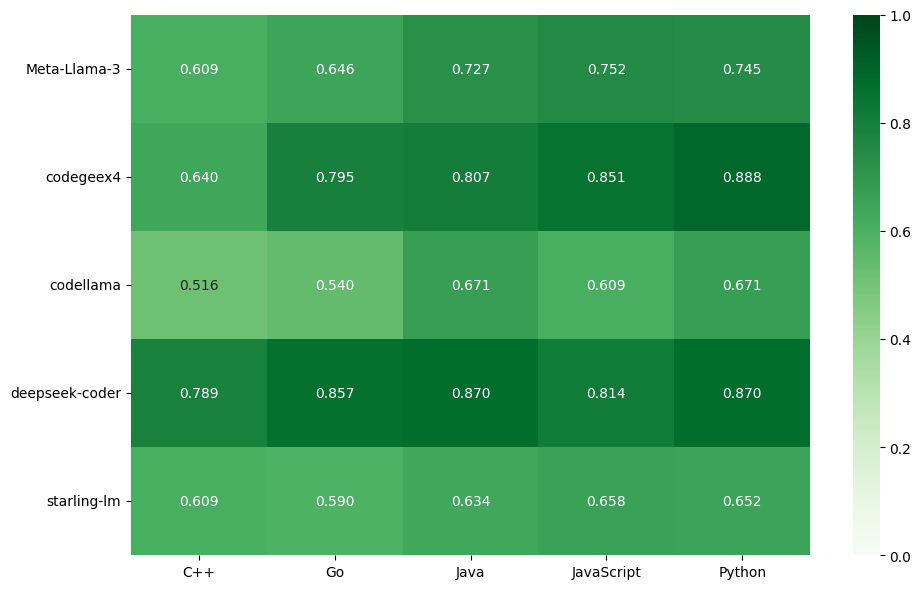

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Pivot the DataFrame for the heatmap
heatmap_data = df_0_averages.pivot("LLM", "Programming Language", "Pass@1")

# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(heatmap_data, 
                       annot=True,               # Annotate with the data values
                       fmt=".3f",                # Format for annotation
                       cmap="Blues",             # Color map
                       vmin=0, vmax=1).set(xlabel=None, ylabel=None)

# Add titles and labels
#plt.title('Pass@1 Scores by LLM and Programming Language (0-shot)', fontsize=16)


# Show the plot
plt.tight_layout()
#plt.savefig("pass1_0shot_humaneval_x.png")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Pivot the DataFrame for the heatmap
heatmap_data = df_0_averages.pivot("LLM", "Programming Language", "Pass@10")

# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(heatmap_data, 
                       annot=True,               # Annotate with the data values
                       fmt=".3f",                # Format for annotation
                       cmap="Blues",             # Color map
                       vmin=0, vmax=1).set(xlabel=None, ylabel=None)

# Add titles and labels
#plt.title('Pass@10 Scores by LLM and Programming Language (0-shot)', fontsize=16)

# Show the plot
plt.tight_layout()
#plt.savefig("pass10_0shot_humaneval_x.png")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Pivot the DataFrame for the heatmap
heatmap_data = df_3_averages.pivot("LLM", "Programming Language", "Pass@1")

# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(heatmap_data, 
                       annot=True,               # Annotate with the data values
                       fmt=".3f",                # Format for annotation
                       cmap="Greens",             # Color map
                       vmin=0, vmax=1).set(xlabel=None, ylabel=None)

# Add titles and labels
#plt.title('Pass@1 Scores by LLM and Programming Language (3-shot)', fontsize=16)

# Show the plot
plt.tight_layout()
#plt.savefig("pass1_3shot_humaneval_x.png")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Pivot the DataFrame for the heatmap
heatmap_data = df_3_averages.pivot("LLM", "Programming Language", "Pass@10")

# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(heatmap_data, 
                       annot=True,               # Annotate with the data values
                       fmt=".3f",                # Format for annotation
                       cmap="Greens",             # Color map
                       vmin=0, vmax=1).set(xlabel=None, ylabel=None)

# Add titles and labels
#plt.title('Pass@10 Scores by LLM and Programming Language (3-shot)', fontsize=16)

# Show the plot
plt.tight_layout()
#plt.savefig("pass10_3shot_humaneval_x.png")
plt.show()


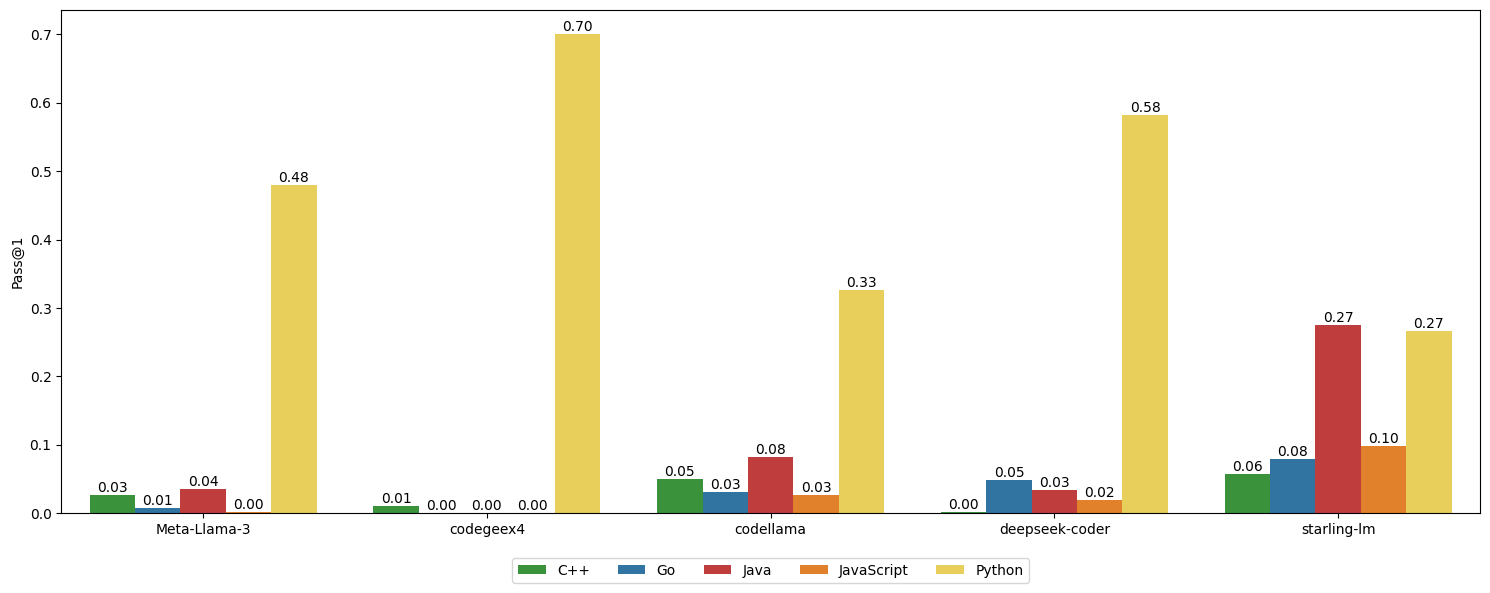

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='Pass@1', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('Pass@1 Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('Pass@1')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("pass1_0shot_humaneval_x.png")
plt.show()


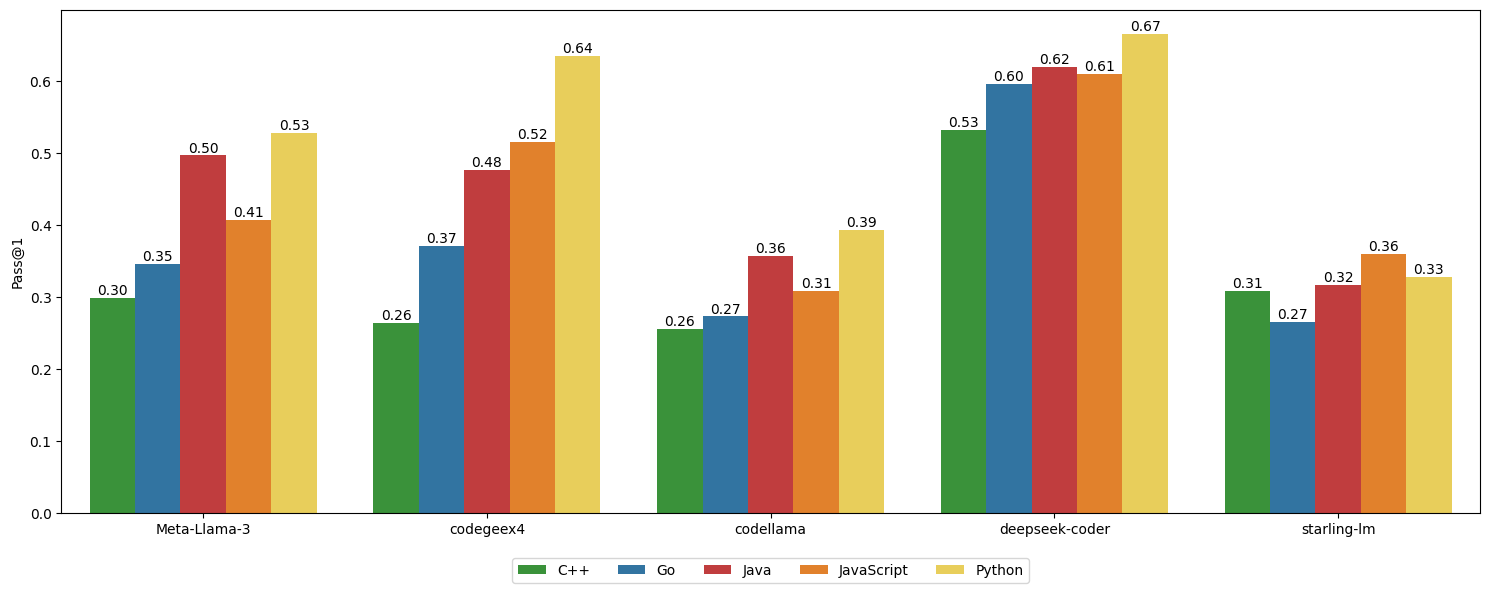

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, 
                       x='LLM', 
                       y='Pass@1', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('Pass@1 Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('Pass@1')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("pass1_3shot_humaneval_x.png")
plt.show()


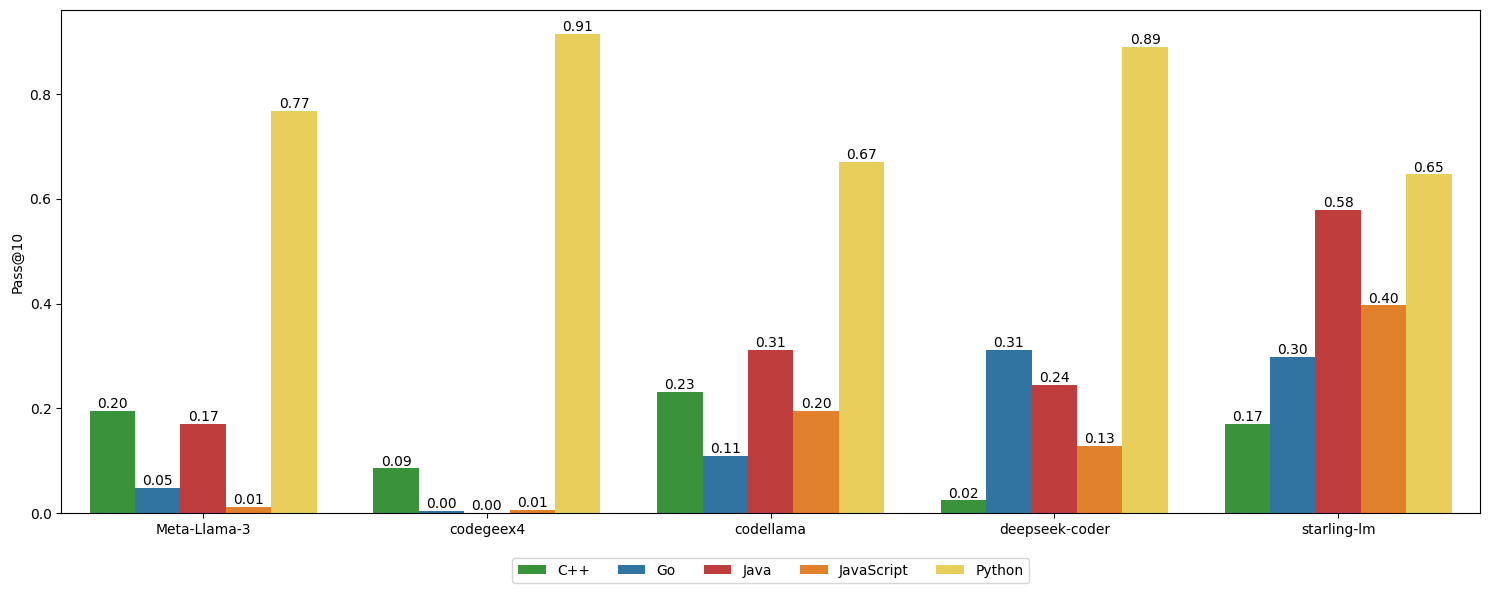

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='Pass@10', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('Pass@10 Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('Pass@10')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("pass10_0shot_humaneval_x.png")

plt.show()


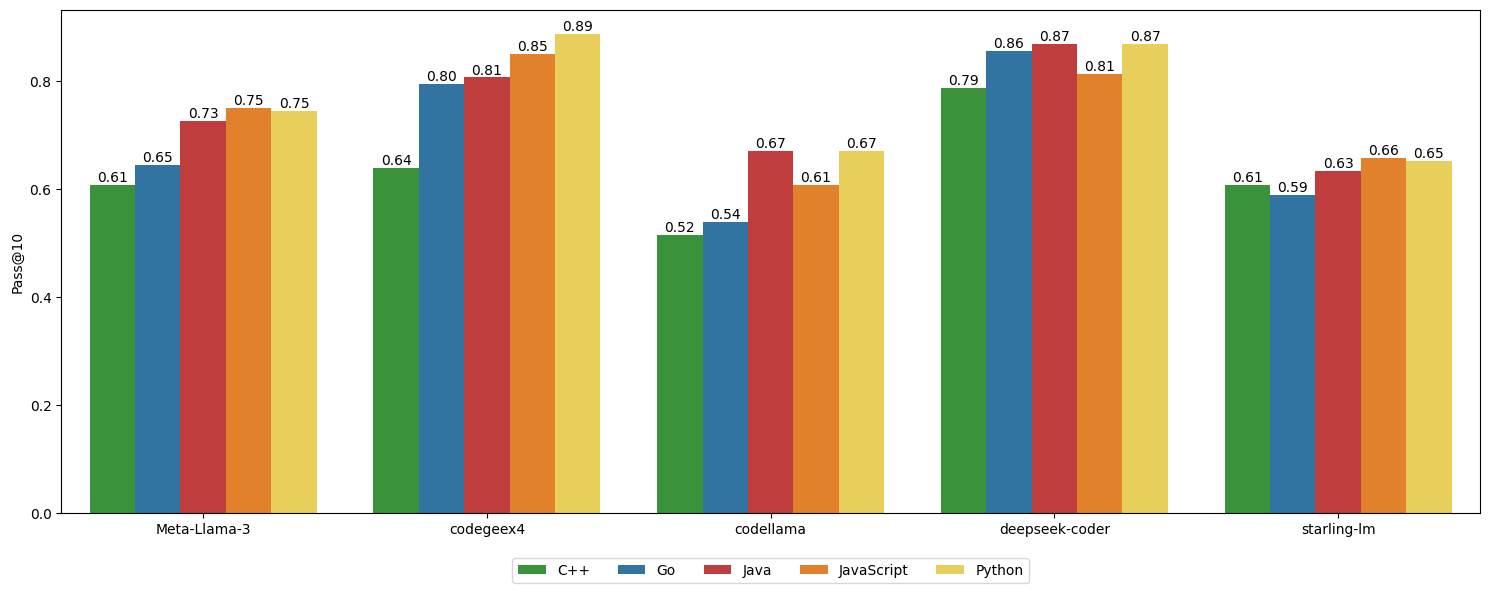

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, 
                       x='LLM', 
                       y='Pass@10', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('Pass@10 Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('Pass@10')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("pass10_3shot_humaneval_x.png")

plt.show()


##### With mean values for each LLM

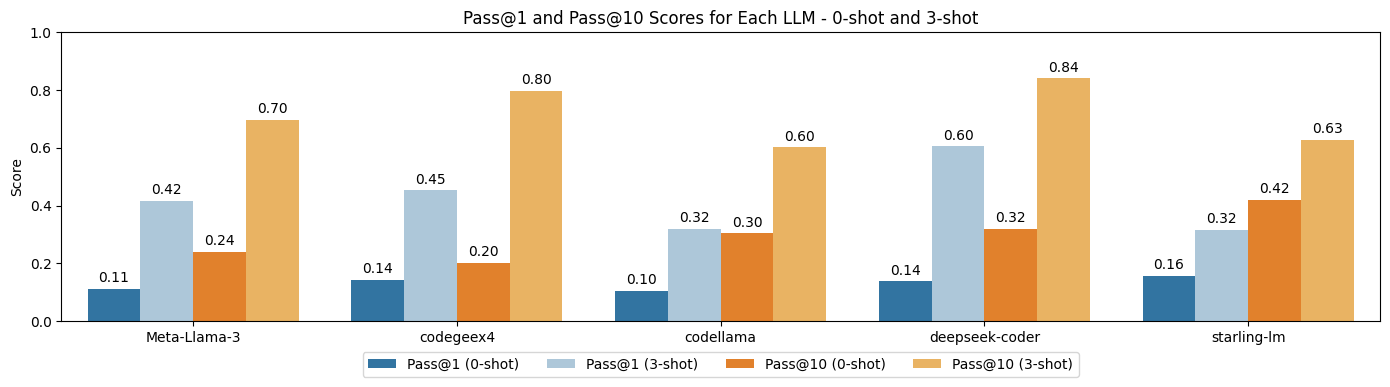

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames to the appropriate format for Pass@1 and Pass@10
df_melted_0 = df_0_averages.melt(id_vars=['LLM'], value_vars=['Pass@1', 'Pass@10'], var_name='Metric', value_name='Score')
df_melted_3 = df_3_averages.melt(id_vars=['LLM'], value_vars=['Pass@1', 'Pass@10'], var_name='Metric', value_name='Score')

# Add a column to indicate the shot type
df_melted_0['Shot'] = '0-shot'
df_melted_3['Shot'] = '3-shot'

# Combine the melted DataFrames for barplot
df_combined = pd.concat([df_melted_0, df_melted_3], ignore_index=True)

# Create a new column for combined Metric and Shot for custom order
df_combined['Metric_Shot'] = df_combined['Metric'] + " (" + df_combined['Shot'] + ")"

# Define the desired order for bar plot
metric_order = [
    'Pass@1 (0-shot)', 'Pass@1 (3-shot)',
    'Pass@10 (0-shot)', 'Pass@10 (3-shot)'
]

# Create a custom order for the Metric_Shot column
df_combined['Metric_Shot'] = pd.Categorical(df_combined['Metric_Shot'], categories=metric_order, ordered=True)

# Define a custom palette with lighter shades for 3-shot metrics
palette = {
    'Pass@1 (0-shot)': '#1f77b4',  # Dark blue for 0-shot
    'Pass@1 (3-shot)': '#a6c8e0',  # Light blue for 3-shot
    'Pass@10 (0-shot)': '#ff7f0e',  # Dark orange for 0-shot
    'Pass@10 (3-shot)': '#ffb84d'   # Light orange for 3-shot
}

# Plot settings for barplot
plt.figure(figsize=(14, 4))
bar_plot = sns.barplot(data=df_combined, x='LLM', y='Score', hue='Metric_Shot', ci=None, palette=palette, dodge=True)

plt.title("Pass@1 and Pass@10 Scores for Each LLM - 0-shot and 3-shot")
plt.xlabel("")
plt.ylabel("Score")
plt.ylim(0, 1)

# Place the legend below the plot and centered
plt.legend(title=None, bbox_to_anchor=(0.5, -0.15), loc='center', ncol=4)

# Add labels to the bars and rotate them 90 degrees
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),  # Format the height to 2 decimal places
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of each bar
                      ha='center', va='baseline',  # Align the text at the center of the bar
                      fontsize=10, color='black',  # Set font size and color
                      xytext=(0, 5),  # Offset the text slightly above the bar
                      textcoords='offset points')  # Use offset points for positioning


plt.grid(False)
plt.tight_layout()
plt.show()


#### BLEU scores

##### Mean values for each LLM

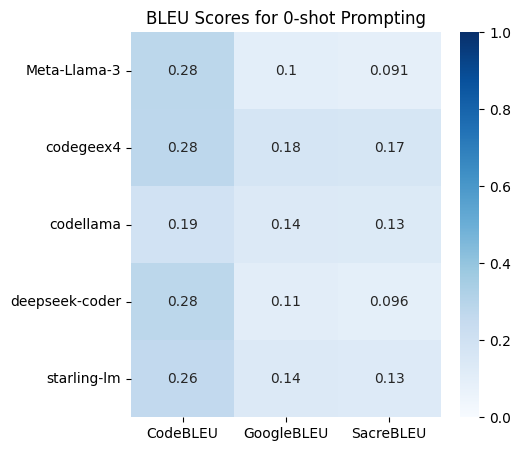

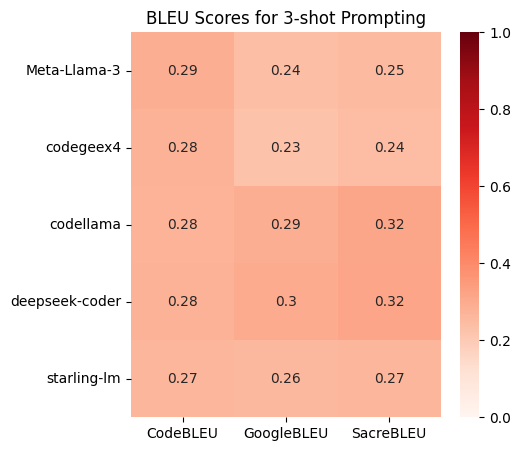

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames for BLEU scores (CodeBLEU, SacreBLEU, GoogleBLEU) for heatmaps
df_bleu_melted_0 = df_0_averages.melt(id_vars=['LLM'], value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], var_name='Metric', value_name='Score')
df_bleu_melted_3 = df_3_averages.melt(id_vars=['LLM'], value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], var_name='Metric', value_name='Score')

# Add a column to indicate the shot type
df_bleu_melted_0['Shot'] = '0-shot'
df_bleu_melted_3['Shot'] = '3-shot'

# Combine melted DataFrames for heatmaps
df_bleu_combined = pd.concat([df_bleu_melted_0, df_bleu_melted_3], ignore_index=True)

# Group by LLM and Metric to resolve duplicate entries by averaging them
df_bleu_combined = df_bleu_combined.groupby(['LLM', 'Metric', 'Shot']).mean().reset_index()

# Create a pivot table to generate heatmaps for each shot type
heatmap_data_0 = df_bleu_combined[df_bleu_combined['Shot'] == '0-shot'].pivot("LLM", "Metric", "Score")
heatmap_data_3 = df_bleu_combined[df_bleu_combined['Shot'] == '3-shot'].pivot("LLM", "Metric", "Score")

height = 5
width = 5

# Create heatmap for 0-shot BLEU scores
plt.figure(figsize=(height, width))
sns.heatmap(heatmap_data_0, annot=True, cmap='Blues', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
plt.title("BLEU Scores for 0-shot Prompting")
plt.show()

# Create heatmap for 3-shot BLEU scores
plt.figure(figsize=(height, width))
sns.heatmap(heatmap_data_3, annot=True, cmap='Reds', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
plt.title("BLEU Scores for 3-shot Prompting")
plt.show()


##### For each Programming Language

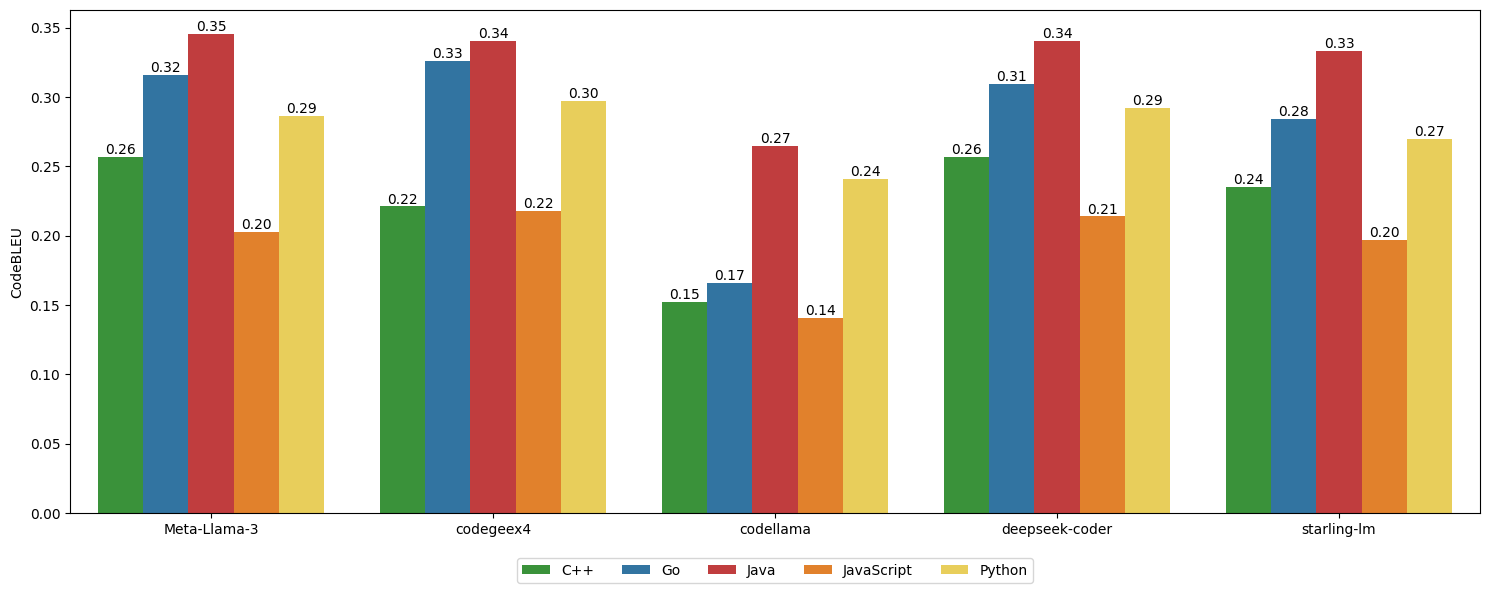

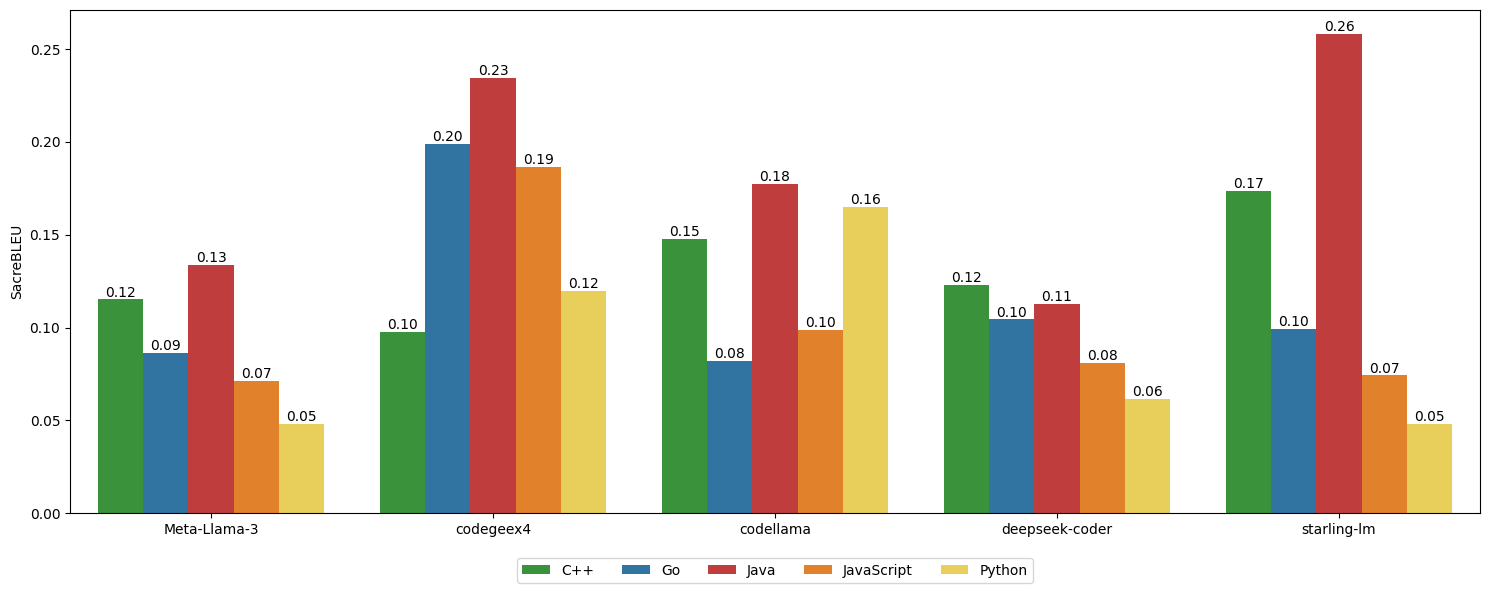

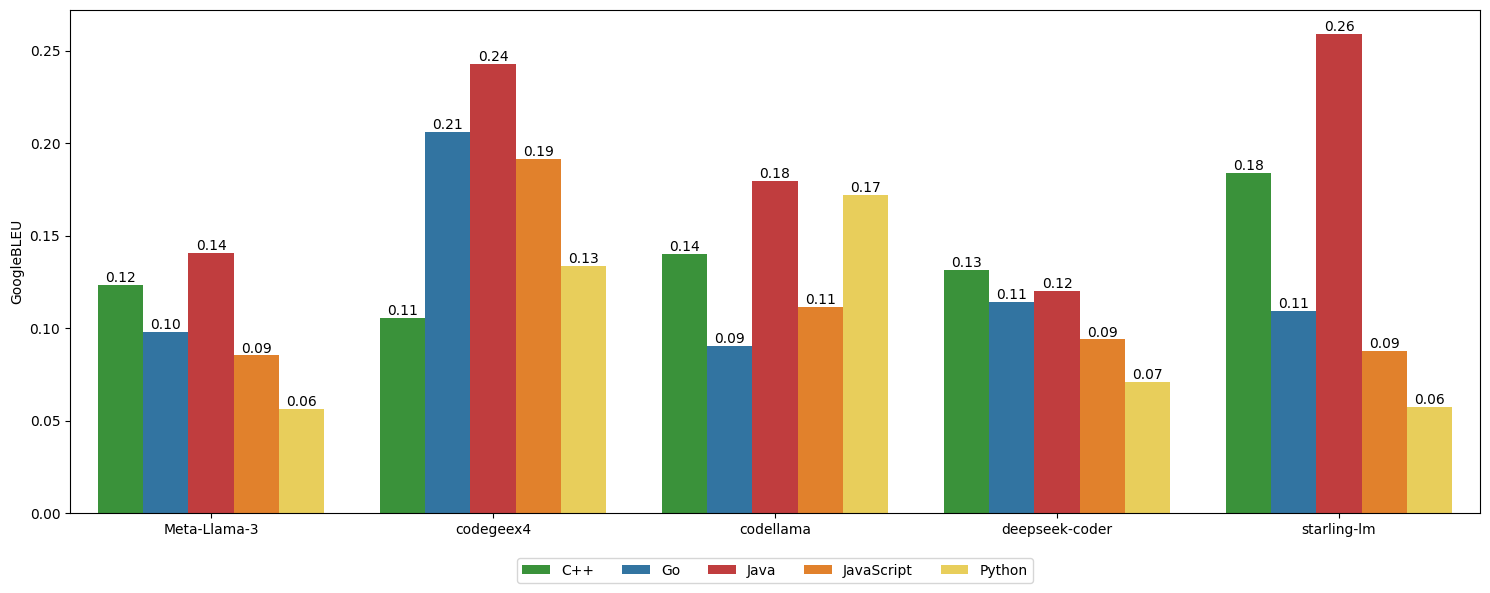

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='CodeBLEU', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('CodeBLEU Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('CodeBLEU')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("codebleu_0shot_humaneval_x.png")

plt.show()

############################################

import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='SacreBLEU', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('SacreBLEU Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('SacreBLEU')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("sacrebleu_0shot_humaneval_x.png")

plt.show()

############################################

import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_0_averages, 
                       x='LLM', 
                       y='GoogleBLEU', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('GoogleBLEU Consumption by LLM and Programming Language (0-shot)')
plt.xlabel('')
plt.ylabel('GoogleBLEU')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("googlebleu_0shot_humaneval_x.png")

plt.show()



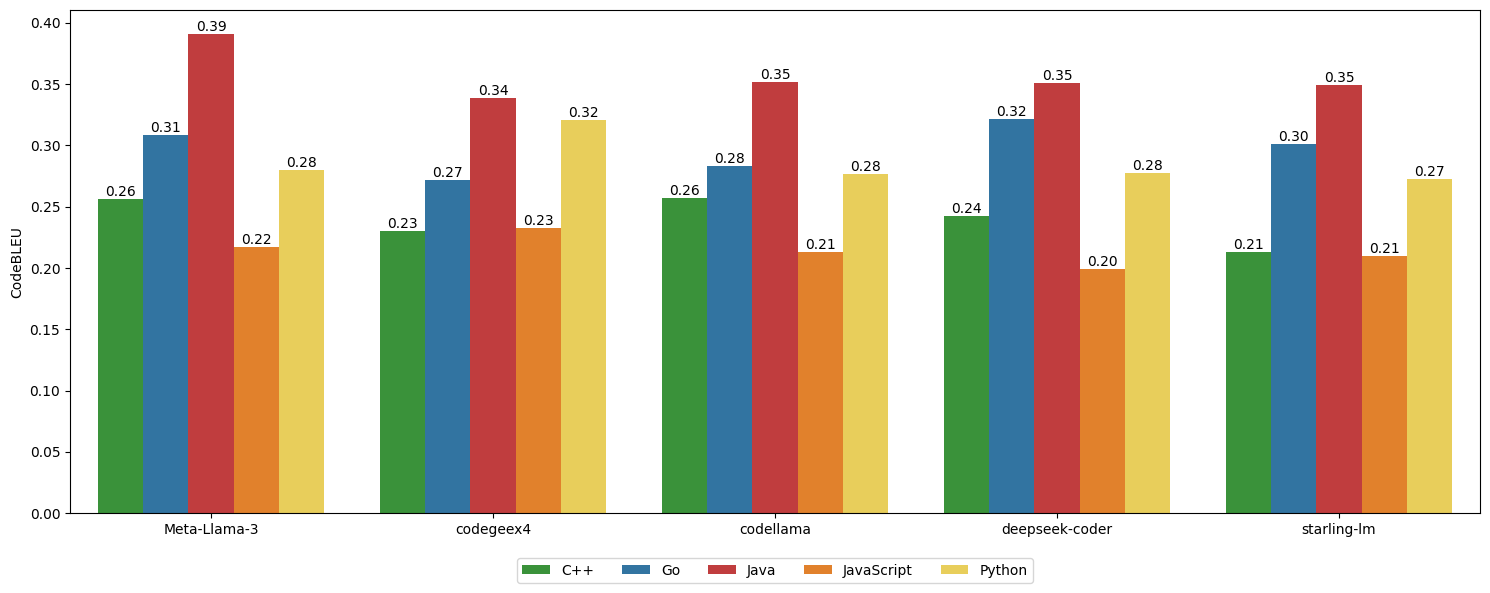

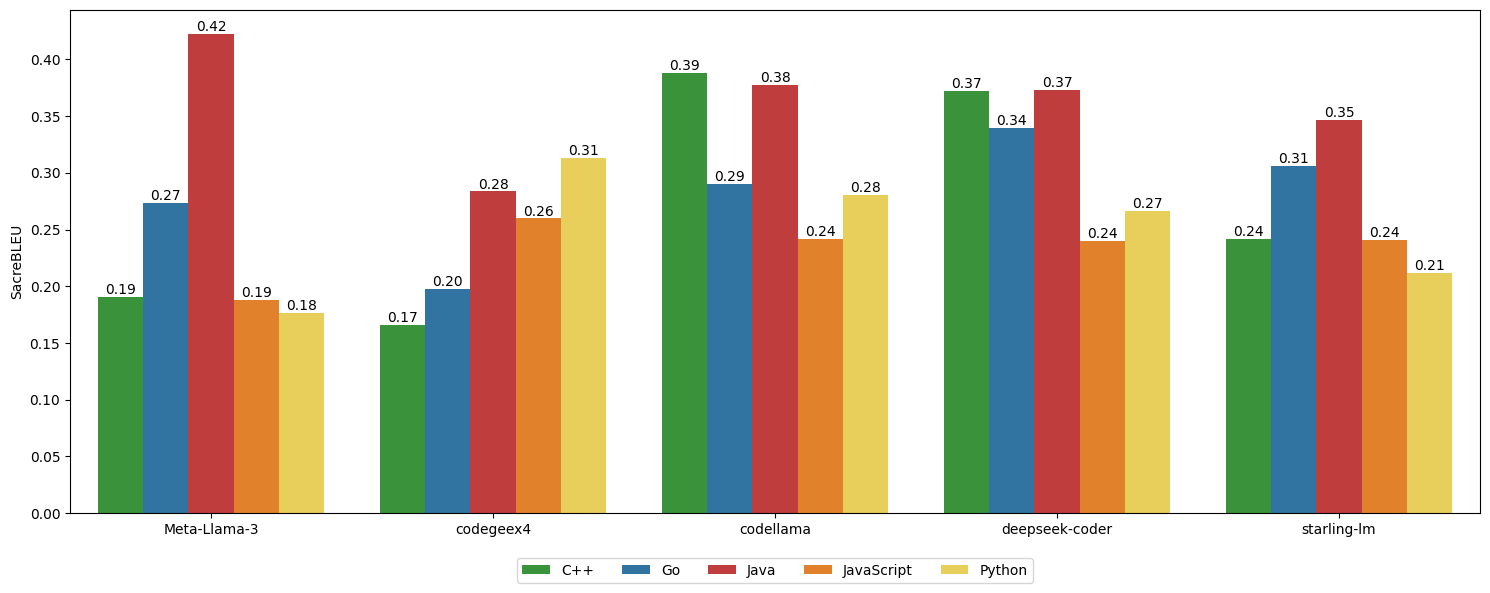

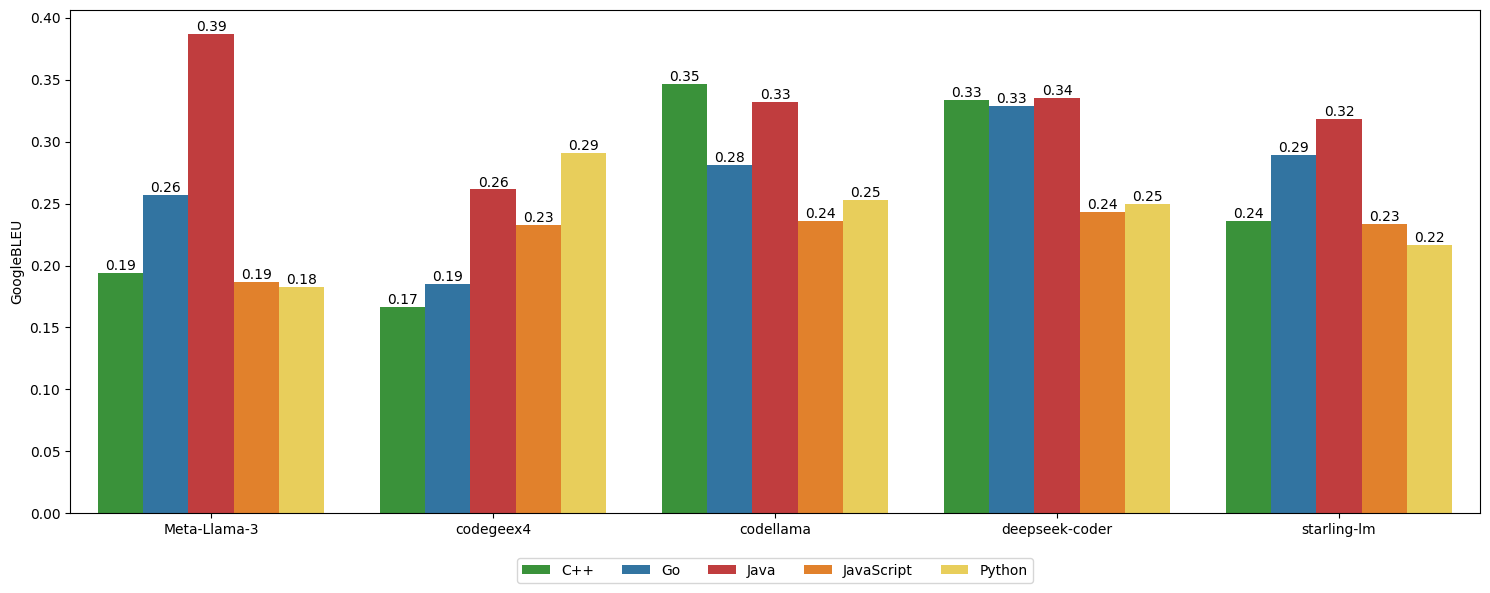

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, 
                       x='LLM', 
                       y='CodeBLEU', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('CodeBLEU Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('CodeBLEU')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("codebleu_3shot_humaneval_x.png")

plt.show()

############################################

import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, 
                       x='LLM', 
                       y='SacreBLEU', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('SacreBLEU Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('SacreBLEU')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("sacrebleu_3shot_humaneval_x.png")

plt.show()

############################################

import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the programming languages
palette = {
    'Go': '#1f77b4',        # Blue
    'Python': '#ffdd44',    # Yellow
    'Java': '#d62728',      # Red
    'JavaScript': '#ff7f0e', # Orange
    'C++': '#2ca02c'        # Green
}

# Define the order of the programming languages
programming_languages_order = ["C++", "Go", 'Java', 'JavaScript', 'Python']

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = sns.barplot(data=df_3_averages, 
                       x='LLM', 
                       y='GoogleBLEU', 
                       hue='Programming Language', 
                       palette=palette,
                       hue_order=programming_languages_order)  # Setting the order

# Add titles and labels
#plt.title('GoogleBLEU Consumption by LLM and Programming Language (3-shot)')
plt.xlabel('')
plt.ylabel('GoogleBLEU')

# Position the legend below the plot
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=5)

# Add labels above each bar with reduced font size
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(False)
plt.tight_layout()
#plt.savefig("googlebleu_3shot_humaneval_x.png")

plt.show()



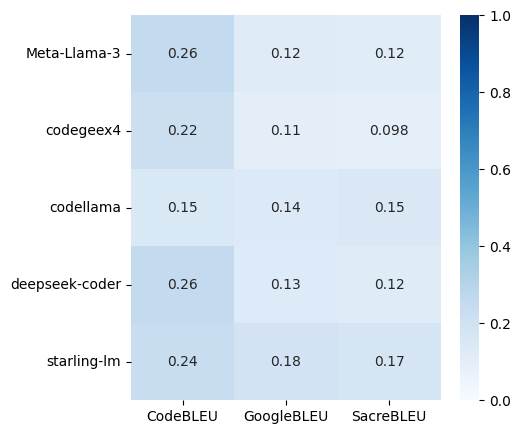

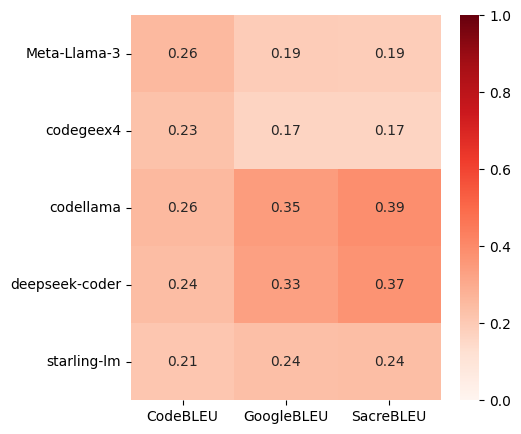

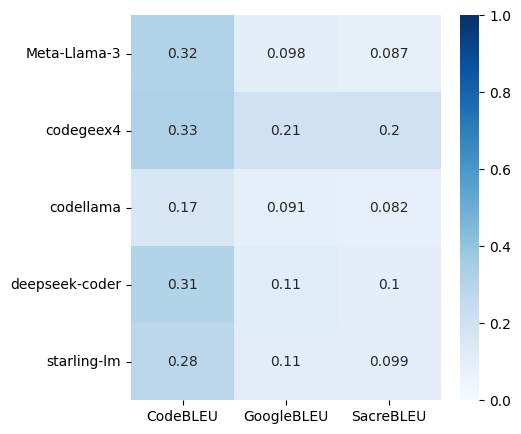

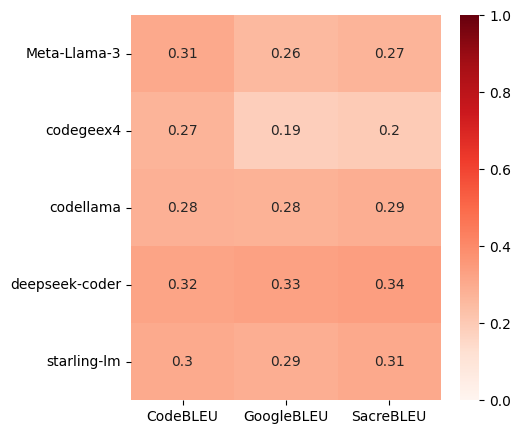

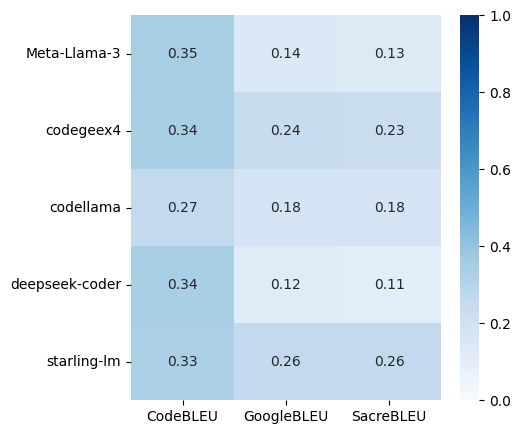

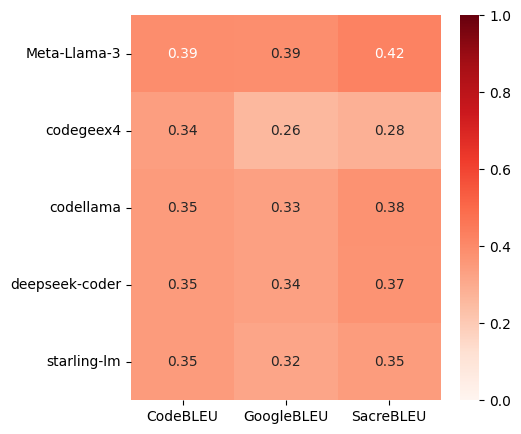

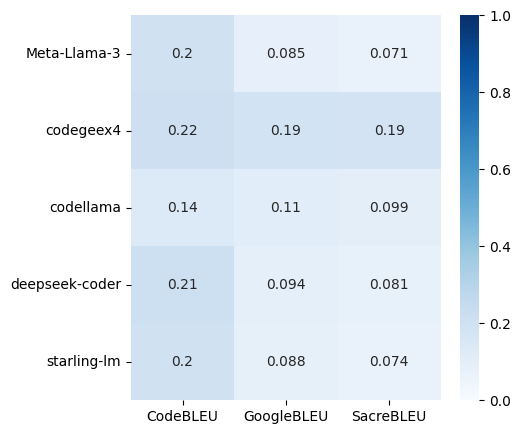

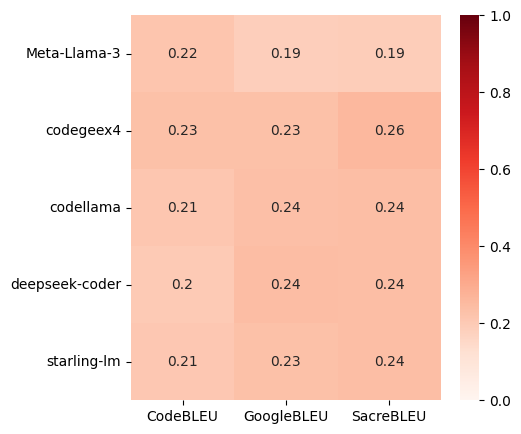

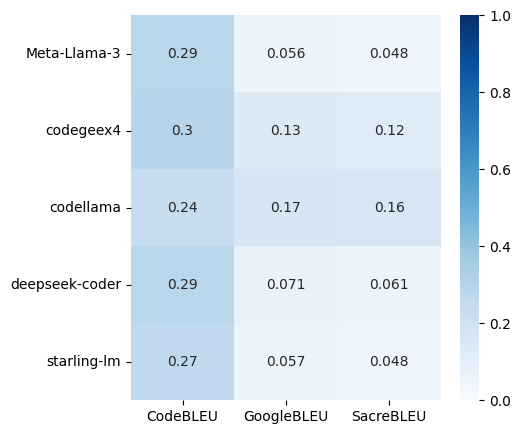

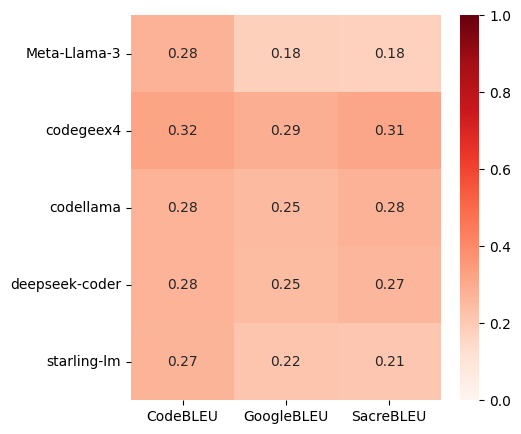

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames for BLEU scores (CodeBLEU, SacreBLEU, GoogleBLEU) for heatmaps, including 'Programming Language'
df_bleu_melted_0 = df_0_averages.melt(id_vars=['LLM', 'Programming Language'], 
                                      value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], 
                                      var_name='Metric', value_name='Score')
df_bleu_melted_3 = df_3_averages.melt(id_vars=['LLM', 'Programming Language'], 
                                      value_vars=['CodeBLEU', 'SacreBLEU', 'GoogleBLEU'], 
                                      var_name='Metric', value_name='Score')

# Add a column to indicate the shot type
df_bleu_melted_0['Shot'] = '0-shot'
df_bleu_melted_3['Shot'] = '3-shot'

# Combine melted DataFrames for heatmaps
df_bleu_combined = pd.concat([df_bleu_melted_0, df_bleu_melted_3], ignore_index=True)

# Group by LLM, Programming Language, and Metric to resolve duplicate entries by averaging them
df_bleu_combined = df_bleu_combined.groupby(['LLM', 'Programming Language', 'Metric', 'Shot']).mean().reset_index()

# Get the unique programming languages in the data
programming_languages = df_bleu_combined['Programming Language'].unique()

height = 5
width = 5

# Loop through each programming language and create a heatmap for both 0-shot and 3-shot BLEU scores
for language in programming_languages:
    # Filter data for the specific programming language
    heatmap_data_0 = df_bleu_combined[(df_bleu_combined['Shot'] == '0-shot') & (df_bleu_combined['Programming Language'] == language)].pivot("LLM", "Metric", "Score")
    heatmap_data_3 = df_bleu_combined[(df_bleu_combined['Shot'] == '3-shot') & (df_bleu_combined['Programming Language'] == language)].pivot("LLM", "Metric", "Score")

    # Create heatmap for 0-shot BLEU scores for the current programming language
    plt.figure(figsize=(width, height))
    sns.heatmap(heatmap_data_0, annot=True, cmap='Blues', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
    #plt.title(f"BLEU Scores for 0-shot Prompting ({language})")
    #plt.savefig(f"humanevalx_bleu_0shot_{language}.png")
    plt.show()

    # Create heatmap for 3-shot BLEU scores for the current programming language
    plt.figure(figsize=(width, height))
    sns.heatmap(heatmap_data_3, annot=True, cmap='Reds', vmin=0, vmax=1).set(xlabel=None, ylabel=None)
    #plt.title(f"BLEU Scores for 3-shot Prompting ({language})")
    #plt.savefig(f"humanevalx_bleu_3shot_{language}.png")
    plt.show()


### LLM Ranking

In [142]:
DATAFRAMES_WITHOUT_OUTLIERS_TO_CSV = False

if DATAFRAMES_WITHOUT_OUTLIERS_TO_CSV:
    import pandas as pd
    
    # Ensure 'SacreBLEU' is divided by 100 only once
    df_0_no_outliers['SacreBLEU'] = df_0_no_outliers['SacreBLEU'] / 100
    df_3_no_outliers['SacreBLEU'] = df_3_no_outliers['SacreBLEU'] / 100
    
    # Select relevant columns for each DataFrame
    df_0_table = df_0_no_outliers[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)',
                                   'CO2 emissions (Kg)', 'Pass@1', 'Pass@10', 'GoogleBLEU', 'CodeBLEU', 'SacreBLEU']].copy()
    df_3_table = df_3_no_outliers[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)',
                                   'CO2 emissions (Kg)', 'Pass@1', 'Pass@10', 'GoogleBLEU', 'CodeBLEU', 'SacreBLEU']].copy()
    
    # Add the "N_SHOT" column using .loc
    df_0_table.loc[:, "N_SHOT"] = "0-shot"
    df_3_table.loc[:, "N_SHOT"] = "3-shot"

    # Combine the two tables into a single DataFrame
    df_table = pd.concat([df_0_table, df_3_table], ignore_index=True)
    
    # Save df_table to a CSV file
    df_table.to_csv('df_table_humaneval_x.csv', index=False)


##### LLMs 0-shot ranking

In [143]:
import pandas as pd

# Dividir a coluna 'SacreBLEU' por 100
df_0_no_outliers['SacreBLEU'] = df_0_no_outliers['SacreBLEU'] / 100

# Selecionar as colunas relevantes do dataframe original
df_0_table = df_0_no_outliers[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)',
                               "CO2 emissions (Kg)",
                               "Pass@1", "Pass@10", "GoogleBLEU", "CodeBLEU", "SacreBLEU"]]

# Calcular os valores médios por cada LLM e Linguagem de Programação
df_0_table_avg = df_0_table.groupby(['LLM', 'Programming Language'], as_index=False).mean()

# Exibir o novo dataframe com as médias
df_0_table_avg


,LLM,Programming Language,CPU Energy (J),Execution time (s),CO2 emissions (Kg),Pass@1,Pass@10,GoogleBLEU,CodeBLEU,SacreBLEU
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,4718.526185,72.401776,0.000366,0.026220,0.195122,0.123414,0.256971,0.115135
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,4701.058799,71.878023,0.000461,0.007317,0.048780,0.098010,0.315574,0.086511
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,3909.191751,59.955080,0.000309,0.035976,0.170732,0.140678,0.345476,0.133636
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,3860.652437,59.149561,0.000379,0.001220,0.012195,0.085230,0.202411,0.071373
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,4982.757047,76.436640,0.000490,0.479878,0.768293,0.056134,0.286537,0.048214
5,codegeex4-all-9b-Q6_K_L,C++,6229.088051,95.700138,0.000494,0.010976,0.085366,0.105386,0.221068,0.097517
6,codegeex4-all-9b-Q6_K_L,Go,2548.661758,38.987941,0.000203,0.000610,0.004653,0.205870,0.326226,0.198654
7,codegeex4-all-9b-Q6_K_L,Java,2593.555918,39.453178,0.000206,0.000000,0.000000,0.242605,0.340198,0.234309
8,codegeex4-all-9b-Q6_K_L,JavaScript,1955.354792,29.893663,0.000155,0.000610,0.006098,0.191231,0.218057,0.186302
9,codegeex4-all-9b-Q6_K_L,Python,2456.046411,37.519930,0.000195,0.700610,0.914634,0.133790,0.297222,0.119884


In [144]:
import pandas as pd


# Calcular a média para cada LLM
df_mean_metrics = df_0_table.groupby('LLM').agg({
    'CPU Energy (J)': 'mean',
    'Execution time (s)': 'mean'
}).reset_index()

# Ordenar o DataFrame pela coluna 'CPU Energy (J)' em ordem crescente para o ranking de consumo de energia
df_ranked = df_mean_metrics.sort_values(by='CPU Energy (J)')

# Criar uma coluna de ranking com base na CPU Energy, em ordem crescente
df_ranked['Rank'] = df_ranked['CPU Energy (J)'].rank(ascending=True, method='min').astype(int)

# Calcular as razões em relação ao primeiro lugar
first_energy = df_ranked['CPU Energy (J)'].iloc[0]
first_time = df_ranked['Execution time (s)'].iloc[0]

df_ranked['Energy Ratio'] = df_ranked['CPU Energy (J)'] / first_energy
df_ranked['Time Ratio'] = df_ranked['Execution time (s)'] / first_time

# Reorganizar as colunas para melhor visualização
df_ranked = df_ranked[['Rank', 'LLM', 
                       'Energy Ratio', 'Time Ratio', 
                       'CPU Energy (J)', 'Execution time (s)'
                       ]]

# Renomear as colunas para melhor clareza
df_ranked.columns = ['Rank', 'LLM', 
                     'Energy Ratio (compared to 1st)', 
                     'Time Ratio (compared to 1st)', 
                     'CPU Energy (J)', 'Execution Time (s)']

# Exibir o ranking final
df_ranked.style.hide_index()


/tmp/ipykernel_6750/190511788.py:36: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_ranked.style.hide_index()


Rank,LLM,Energy Ratio (compared to 1st),Time Ratio (compared to 1st),CPU Energy (J),Execution Time (s)
1,codellama-7b-instruct.Q5_K_M,1.000000,1.000000,2253.500716,34.320584
2,codegeex4-all-9b-Q6_K_L,1.416464,1.423586,3192.002735,48.858300
3,Meta-Llama-3-8B-Instruct-Q6_K,1.971595,1.984218,4442.990233,68.099507
4,deepseek-coder-6.7b-instruct.Q5_K_M,2.142433,2.153731,4827.975101,73.917313
5,starling-lm-7b-alpha.Q5_K_S,2.450777,2.466989,5522.826693,84.668497


##### LLMs 3-shot ranking

In [145]:
import pandas as pd

# Dividir a coluna 'SacreBLEU' por 100
df_3_no_outliers['SacreBLEU'] = df_3_no_outliers['SacreBLEU'] / 100

# Selecionar as colunas relevantes do dataframe original
df_3_table = df_3_no_outliers[['LLM', 'Programming Language', 'CPU Energy (J)', 'Execution time (s)',
                               "CO2 emissions (Kg)",
                               "Pass@1", "Pass@10", "GoogleBLEU", "CodeBLEU", "SacreBLEU"]]

# Calcular os valores médios por cada LLM e Linguagem de Programação
df_3_table_avg = df_3_table.groupby(['LLM', 'Programming Language'], as_index=False).mean()

# Exibir o novo dataframe com as médias
df_3_table_avg

,LLM,Programming Language,CPU Energy (J),Execution time (s),CO2 emissions (Kg),Pass@1,Pass@10,GoogleBLEU,CodeBLEU,SacreBLEU
0,Meta-Llama-3-8B-Instruct-Q6_K,C++,2426.672815,37.046757,0.000229,0.298758,0.608696,0.193793,0.256362,0.190983
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,1253.239550,19.002239,0.000117,0.346584,0.645963,0.256980,0.308574,0.273339
2,Meta-Llama-3-8B-Instruct-Q6_K,Java,1165.966881,17.539500,0.000110,0.496894,0.726708,0.387080,0.390987,0.422487
3,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,1263.762578,19.003809,0.000123,0.407453,0.751553,0.186412,0.217391,0.187810
4,Meta-Llama-3-8B-Instruct-Q6_K,Python,1076.894002,15.953538,0.000083,0.528571,0.745342,0.182752,0.280240,0.176424
5,codegeex4-all-9b-Q6_K_L,C++,3510.520177,53.771384,0.000279,0.263975,0.639752,0.166656,0.230233,0.165969
6,codegeex4-all-9b-Q6_K_L,Go,2304.231230,35.069726,0.000183,0.370807,0.795031,0.185401,0.272151,0.197325
7,codegeex4-all-9b-Q6_K_L,Java,1930.634000,29.434259,0.000153,0.477019,0.807453,0.261454,0.338438,0.283600
8,codegeex4-all-9b-Q6_K_L,JavaScript,1343.782394,20.383006,0.000107,0.515528,0.850932,0.233098,0.232976,0.259782
9,codegeex4-all-9b-Q6_K_L,Python,944.651750,14.322239,0.000075,0.635404,0.888199,0.290623,0.320981,0.312781


In [146]:
import pandas as pd


# Calcular a média para cada LLM
df_mean_metrics = df_3_table.groupby('LLM').agg({
    'CPU Energy (J)': 'mean',
    'Execution time (s)': 'mean'
}).reset_index()

# Ordenar o DataFrame pela coluna 'CPU Energy (J)' em ordem crescente para o ranking de consumo de energia
df_ranked = df_mean_metrics.sort_values(by='CPU Energy (J)')

# Criar uma coluna de ranking com base na CPU Energy, em ordem crescente
df_ranked['Rank'] = df_ranked['CPU Energy (J)'].rank(ascending=True, method='min').astype(int)

# Calcular as razões em relação ao primeiro lugar
first_energy = df_ranked['CPU Energy (J)'].iloc[0]
first_time = df_ranked['Execution time (s)'].iloc[0]

df_ranked['Energy Ratio'] = df_ranked['CPU Energy (J)'] / first_energy
df_ranked['Time Ratio'] = df_ranked['Execution time (s)'] / first_time

# Reorganizar as colunas para melhor visualização
df_ranked = df_ranked[['Rank', 'LLM', 
                       'Energy Ratio', 'Time Ratio', 
                       'CPU Energy (J)', 'Execution time (s)'
                       ]]

# Renomear as colunas para melhor clareza
df_ranked.columns = ['Rank', 'LLM', 
                     'Energy Ratio (compared to 1st)', 
                     'Time Ratio (compared to 1st)', 
                     'CPU Energy (J)', 'Execution Time (s)']

# Exibir o ranking final
df_ranked.style.hide_index()


/tmp/ipykernel_6750/3027156059.py:36: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_ranked.style.hide_index()


Rank,LLM,Energy Ratio (compared to 1st),Time Ratio (compared to 1st),CPU Energy (J),Execution Time (s)
1,codellama-7b-instruct.Q5_K_M,1.000000,1.000000,1180.975077,17.716751
2,deepseek-coder-6.7b-instruct.Q5_K_M,1.007585,1.015045,1189.933278,17.983302
3,starling-lm-7b-alpha.Q5_K_S,1.073303,1.081481,1267.544366,19.160336
4,Meta-Llama-3-8B-Instruct-Q6_K,1.236476,1.245399,1460.246965,22.064423
5,codegeex4-all-9b-Q6_K_L,1.732747,1.761348,2046.330533,31.205371


### Count number of tokens

In [147]:
import os
import pandas as pd
import re

def count_tokens_in_file(file_path):
    """Count the number of tokens in a text file using plain text splitting."""
    tokens_count = 0
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            # Split the content based on spaces, punctuation, and newlines
            tokens = re.findall(r'\S+', content)
            tokens_count = len(tokens)
    except Exception as e:
        # Log the error but continue processing
        print(f"Error processing {file_path}: {e}")
    
    return tokens_count

def count_tokens_in_directory(base_dir, prompt_type):
    """Traverse the directory and count tokens in all Python files."""
    data = []

    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.py'):  # Ensure we're only processing Python files
                file_path = os.path.join(root, file)
                num_tokens = count_tokens_in_file(file_path)
                
                # Extract the subdirectory structure (after 'base_dir')
                sub_dir = os.path.relpath(root, base_dir)
                data.append({
                    "Subfolder": sub_dir, 
                    "File": file, 
                    "Tokens": num_tokens,
                    "Prompt Type": prompt_type  # Add column for 0-shot or 3-shot
                })

    # Create a DataFrame with the collected data
    df = pd.DataFrame(data)
    return df

# Define the base directories for 0-shot and 3-shot
base_dir0 = "returned_prompts/Meta-Llama-3-8B-Instruct-Q6_K/humaneval_x/0-shot/python/"
base_dir3 = "returned_prompts/Meta-Llama-3-8B-Instruct-Q6_K/humaneval_x/3-shot/python/"

# Count tokens and store the result in DataFrames, specifying the prompt type
df_tokens0 = count_tokens_in_directory(base_dir0, '0-shot')
df_tokens3 = count_tokens_in_directory(base_dir3, '3-shot')

# Combine both DataFrames into one
df_tokens_combined = pd.concat([df_tokens0, df_tokens3], ignore_index=True)
df_tokens_combined.head(2)

""


In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

want_to_run = False
if want_to_run:
    # Filtrar apenas para as subpastas 'Python_4' e 'Python_5'
    df_filtered = df_tokens_combined[df_tokens_combined['Subfolder'].isin(['Python_4', 'Python_5'])]

    # Agrupar o DataFrame para as subpastas selecionadas
    df_grouped = df_filtered.groupby(['File', 'Subfolder', 'Prompt Type'])['Tokens'].sum().reset_index()

    # Função para plotar os dados de cada subpasta
    def plot_humanevalx(df, subfolder_name, legend_position='upper right'):
        # Separar os dados de 0-shot e 3-shot
        df_0_shot = df[df['Prompt Type'] == '0-shot']
        df_3_shot = df[df['Prompt Type'] == '3-shot']

        # Unir os dados de 0-shot e 3-shot com base nos arquivos ('File')
        df_merged = pd.merge(
            df_0_shot[['File', 'Tokens']],
            df_3_shot[['File', 'Tokens']],
            on='File',
            suffixes=('_0_shot', '_3_shot')
        )

        # Configurar largura das barras e posições para os arquivos
        bar_width = 0.35
        r1 = np.arange(len(df_merged['File']))
        r2 = [x + bar_width for x in r1]

        # Criar o gráfico de barras agrupadas
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plotar as barras para 0-shot e 3-shot
        bars_0_shot = ax.bar(r1, df_merged['Tokens_0_shot'], color='lightblue', width=bar_width, label='0-shot')
        bars_3_shot = ax.bar(r2, df_merged['Tokens_3_shot'], color='lightgreen', width=bar_width, label='3-shot')

        # Extrair os números de geração dos nomes dos arquivos (assumindo a estrutura 'gen-{n}')
        labels = df_merged['File'].str.extract(r'gen-(\d+)')[0].astype(int)

        # Criar rótulos personalizados para o eixo X
        xticks_labels = [f"gen-{gen}" for gen in labels]

        # Configurar os rótulos personalizados no eixo X
        ax.set_xticks([r + bar_width / 2 for r in r1])
        ax.set_xticklabels(xticks_labels, rotation=90)

        # Configurar limite no eixo Y
        ax.set_ylim(0, 360)

        # Adicionar rótulos e título
        ax.set_ylabel('Number of Tokens Generated', fontweight='bold')
        #ax.set_title(f'Tokens for {subfolder_name} by Prompt Type', fontsize=12)

        # Adicionar valores dos tokens no topo das barras
        for bar in bars_0_shot:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=9)

        for bar in bars_3_shot:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=9)

        # Adicionar legenda na posição especificada
        ax.legend(loc=legend_position, fontsize=10)

        # Ajustar layout para evitar sobreposições
        plt.tight_layout()
        plt.savefig(f'tokens_{subfolder_name}.pdf', dpi=300, bbox_inches='tight')
        plt.show()

    # Plotar para 'Python_4'
    plot_humanevalx(df_grouped[df_grouped['Subfolder'] == 'Python_4'], 'Python_4', legend_position='upper right')

    # Plotar para 'Python_5'
    plot_humanevalx(df_grouped[df_grouped['Subfolder'] == 'Python_5'], 'Python_5', legend_position='upper left')

